# Plotting with Seaborn
## Milestone 2: Visualization of Relationships in Categorical Data

### Objective
In this milestone, we will use the Seaborn library to visualize the distribution of hours worked per week by the respondents in two income groups with respect to their education. We will use and customize a Seaborn bar plot and catplot.

### Importance of the Project
Visualizing the distribution of features in a dataset helps us identify important statistical information and gain insight into the features. By creating these plots, you will be able to tell the relative proportion of citizens working more hours per week than others. The Seaborn library is very helpful for this type of statistical plotting.

### 1. Import the required Python packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
from matplotlib.backends.backend_pdf import PdfPages

#### Dataset
Features in the data:

- **age**: Age in years (Continuous)
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked (Categorical)
- **fnlwgt**: Final weight, a weight factor computed by Census Bureau (Continuous)
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool (Categorical)
- **education_num**: Number of years of education completed (Continuous)
- **marital_status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse (Categorical)
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces (Categorical)
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried (Categorical)
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black (Categorical)
- **sex**: Female, Male (Categorical)
- **capital_gain**: Income from sources other than salary (Continuous)
- **capital_loss**: Loss of income (Continuous)
- **hours_per_week**: Hours worked per week (Continuous)
- **native_country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holland-Netherlands.
- **discretized_gross_income** -: <= 50K, > 50K
- **workclass_sc**:
- **education_sc**:
- **marital_status_sc**: 
- **occupation_sc**: 

In [3]:
import matplotlib as mpl

In [4]:
print('matplotlib: {}'. format(mpl. __version__))
print('pandas: {}'. format(pd. __version__))
print('seaborn: {}'. format(sns. __version__))
print('numpy: {}'. format(np. __version__))

matplotlib: 3.9.2
pandas: 2.2.2
seaborn: 0.13.2
numpy: 1.26.4


### 2. Read the cleaned data file into a pandas Dataframe.
You created a cleaned data file in Milestone 1

In [5]:
data_loc = "./data/"
img_loc = "./img/"

In [6]:
# We read the csv file created in milestone 1 with the Pandas function read_csv
df = pd.read_csv(data_loc+"cleaned_adult_consensus.csv")

In [7]:
# We inspect the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       30162 non-null  int64 
 1   workclass                 30162 non-null  object
 2   education                 30162 non-null  object
 3   education_num             30162 non-null  int64 
 4   marital_status            30162 non-null  object
 5   occupation                30162 non-null  object
 6   sex                       30162 non-null  object
 7   capital_gain              30162 non-null  int64 
 8   capital_loss              30162 non-null  int64 
 9   hours_per_week            30162 non-null  int64 
 10  native_country            30162 non-null  object
 11  discretized_gross_income  30162 non-null  object
 12  workclass_sc              30162 non-null  object
 13  education_sc              30162 non-null  object
 14  marital_status_sc     

In [9]:
# Sample 10 row from the DataFrame. 
df.sample(10)

,age,workclass,education,education_num,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,discretized_gross_income,workclass_sc,education_sc,marital_status_sc,occupation_sc
13009,71,Private,HS-grad,9,Widowed,Sales,Female,0,0,20,United-States,<=50K,Private,HS-grad,Widowed,Sales
26428,31,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,United-States,<=50K,Private,HS-grad,Married,Service
5475,34,Self-emp-not-inc,HS-grad,9,Separated,Exec-managerial,Male,0,0,50,United-States,<=50K,Self-employed,HS-grad,Separated,Manager
14517,27,Private,Bachelors,13,Never-married,Tech-support,Female,0,0,40,United-States,<=50K,Private,Bachelors,Never-married,Service
11664,39,Private,Some-college,10,Separated,Adm-clerical,Female,0,0,40,United-States,<=50K,Private,Some-college,Separated,Adm-clerical
4555,37,Private,10th,6,Married-civ-spouse,Farming-fishing,Male,0,0,35,Mexico,<=50K,Private,School,Married,Farming
22665,22,Private,HS-grad,9,Never-married,Other-service,Female,0,0,40,United-States,<=50K,Private,HS-grad,Never-married,Service
1055,33,Private,Masters,14,Married-civ-spouse,Prof-specialty,Male,15024,0,44,United-States,>50K,Private,Masters,Married,Professional
26899,28,Private,HS-grad,9,Never-married,Prof-specialty,Female,0,0,40,United-States,<=50K,Private,HS-grad,Never-married,Professional
27264,27,Private,HS-grad,9,Never-married,Handlers-cleaners,Male,0,0,37,United-States,<=50K,Private,HS-grad,Never-married,Service


In [10]:
# Sample 10 row from the DataFrame, but only for selected columns 
df[["hours_per_week", "education", "education_sc","sex","discretized_gross_income"]].sample(10)

,hours_per_week,education,education_sc,sex,discretized_gross_income
28253,38,Assoc-voc,Assoc-voc,Male,>50K
5914,40,HS-grad,HS-grad,Male,<=50K
23811,40,Some-college,Some-college,Female,<=50K
15539,50,11th,School,Male,<=50K
27059,30,HS-grad,HS-grad,Female,<=50K
10471,40,HS-grad,HS-grad,Male,>50K
7209,40,Some-college,Some-college,Female,<=50K
4249,12,Some-college,Some-college,Male,<=50K
12578,50,Doctorate,Doctorate,Male,>50K
15236,15,HS-grad,HS-grad,Female,<=50K


### 3. Set the Seaborn theme and choose the color palette for plots.
Use the function 
- set_theme()
- set_palette() 

In [11]:
# The Seaborn function set_theme sets aspects of the visual theme for all matplotlib and seaborn plots.
# Called with no parameters it activates the default theme
sns.set_theme()

In [12]:
# We choose a theme with a white style
sns.set_theme(style = "white")

### Choose a color palette

In [13]:
# The Seaborn function color_palette when called without parameters 
# returns the current Seaborn color palette
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [14]:
# default Matplolib palette
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [15]:
# We can use the function with the differenct color palettes to see the colors in each one
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [16]:
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [17]:
sns.color_palette("deep")

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [18]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [19]:
sns.color_palette("Spectral")

[(0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197)]

In [20]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [21]:
print(sns.color_palette("pastel").as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


In [22]:
sns.color_palette("pastel6")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

#### Qualitative palettes
Qualitative palettes are good for representing categorical data because most of their variation in the hue component.

### Circular color schemes
When you have an arbitrary number of categories, the easiest approach to finding unique hues is to draw evenly-spaced colors in a circular color space

In [23]:
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [24]:
print(sns.color_palette("hls", 8).as_hex())

['#db5f57', '#dbc257', '#91db57', '#57db80', '#57d3db', '#5770db', '#a157db', '#db57b2']


In [25]:
# Because of the way the human visual system works, colors that have the same luminance and saturation in terms of RGB values won't necessary
# look equally intense to use
# This interface achieve less intensity variation as you rotate around the color wheel
sns.color_palette("husl", 8)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.96038885399407, 0.3814317878772117, 0.8683117650835491)]

#### Color Brewer Palettes

In [26]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [27]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

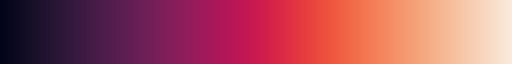

In [28]:
sns.color_palette("rocket", as_cmap=True)

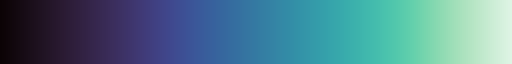

In [29]:
sns.color_palette("mako", as_cmap=True)

In [30]:
sns.color_palette("mako",8)

[(0.15540398, 0.09670855, 0.18094993),
 (0.23142077, 0.18058733, 0.3644173),
 (0.24958205, 0.28556371, 0.55701246),
 (0.21288172, 0.41555771, 0.62373011),
 (0.20372653, 0.54325208, 0.65251978),
 (0.220668, 0.66594665, 0.67485792),
 (0.33437168, 0.79042043, 0.67734882),
 (0.63140509, 0.87600675, 0.72741689)]

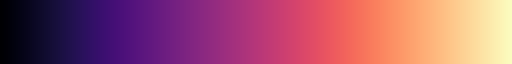

In [31]:
sns.color_palette("magma", as_cmap=True)

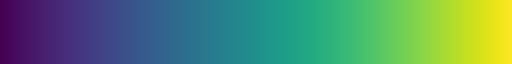

In [32]:
sns.color_palette("viridis", as_cmap=True)

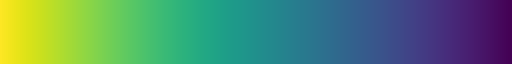

In [33]:
# reverse using _r
sns.color_palette("viridis_r", as_cmap=True)

In [34]:
# reverse using _r
sns.color_palette("viridis")

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [35]:
print(sns.color_palette("pastel6").as_hex())

['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0']


In [36]:
# I'll go for the pastel palette
sns.set_palette("pastel")

#### Diverging palettes

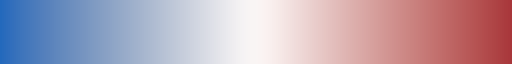

In [37]:
sns.color_palette("vlag", as_cmap=True)

### 4. Set runtime configuration parameters for individual plot 1.

Use the Seaborn set() method with an rc dictionary containing the names and values of configuration parameters.

In [38]:
sns.set_theme(style = "white",
        palette = "pastel",
        rc = 
        {'figure.figsize':(25,12), 
         'axes.titlesize': 30,
         'axes.labelsize': 20,
         'axes.grid':True,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
) 

In [39]:
sns.color_palette()

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

### 5. Initialize a PdfPages object with a filename.

We will save both plots of this milestone in the same pdf file.
Use the name M2_P3.pdf for your deliverable file.

In [54]:
pdf = PdfPages(img_loc+"P3_M2.pdf")

### 6. Create and customize a bar plot to visualize hours worked versus education for two income groups.

Use the sns.barplot() function with the ‘education’ column of your DataFrame. 
For ‘x’ use ‘hours-per-week’ and for ‘y’ use ‘hue’ arguments to differentiate between two income classes.

In [41]:
df[["education_sc","hours_per_week","discretized_gross_income"]].groupby(["education_sc","discretized_gross_income"]).count()

hours_per_week
education_sc discretized_gross_income                
Assoc-acdm   <=50K                                752
             >50K                                 256
Assoc-voc    <=50K                                963
             >50K                                 344
Bachelors    <=50K                               2918
             >50K                                2126
Doctorate    <=50K                                 95
             >50K                                 280
HS-grad      <=50K                               8223
             >50K                                1617
Masters      <=50K                                709
             >50K                                 918
Preschool    <=50K                                 45
Prof-school  <=50K                                136
             >50K                                 406
School       <=50K                               3471
             >50K                                 225
Some-college <=50K                               5342
             >50K                                1336

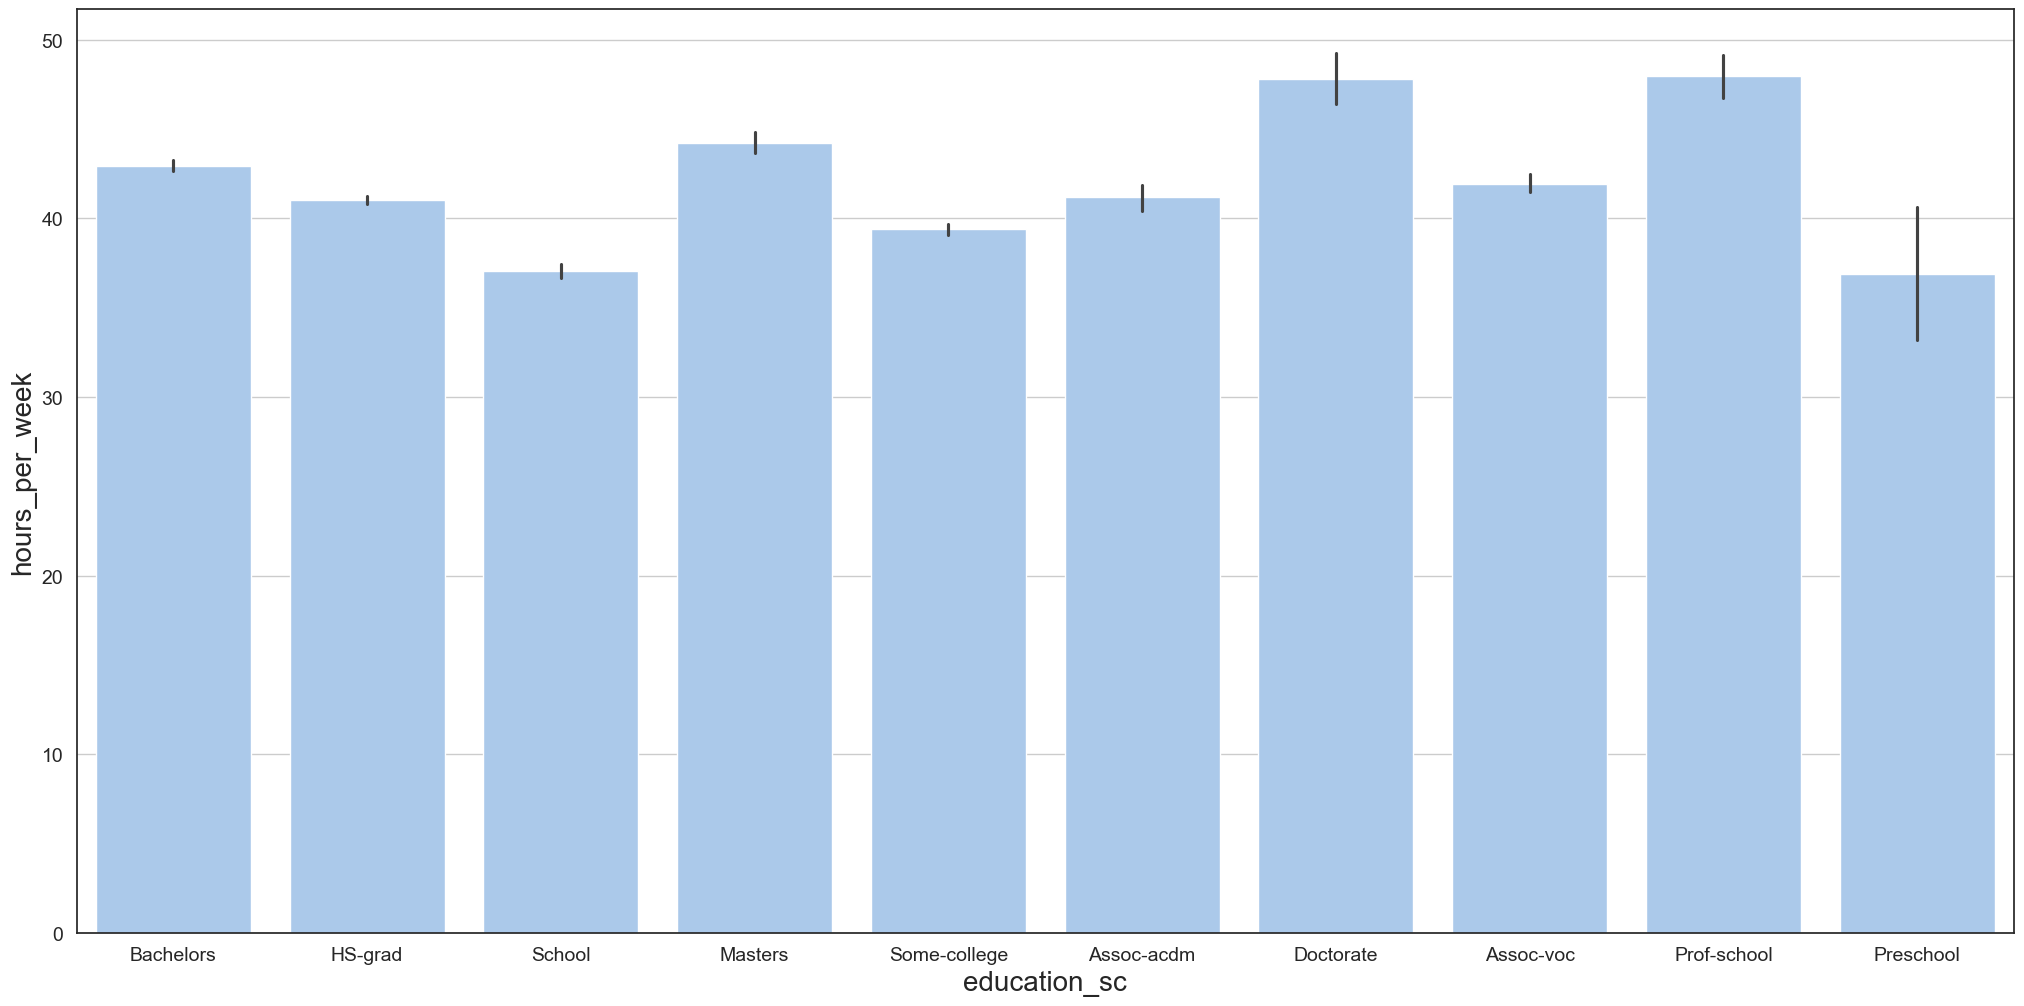

In [45]:
sns.barplot(
    data= df, 
    x = "education_sc",
    y = "hours_per_week",
    estimator = "mean"
)
plt.show()

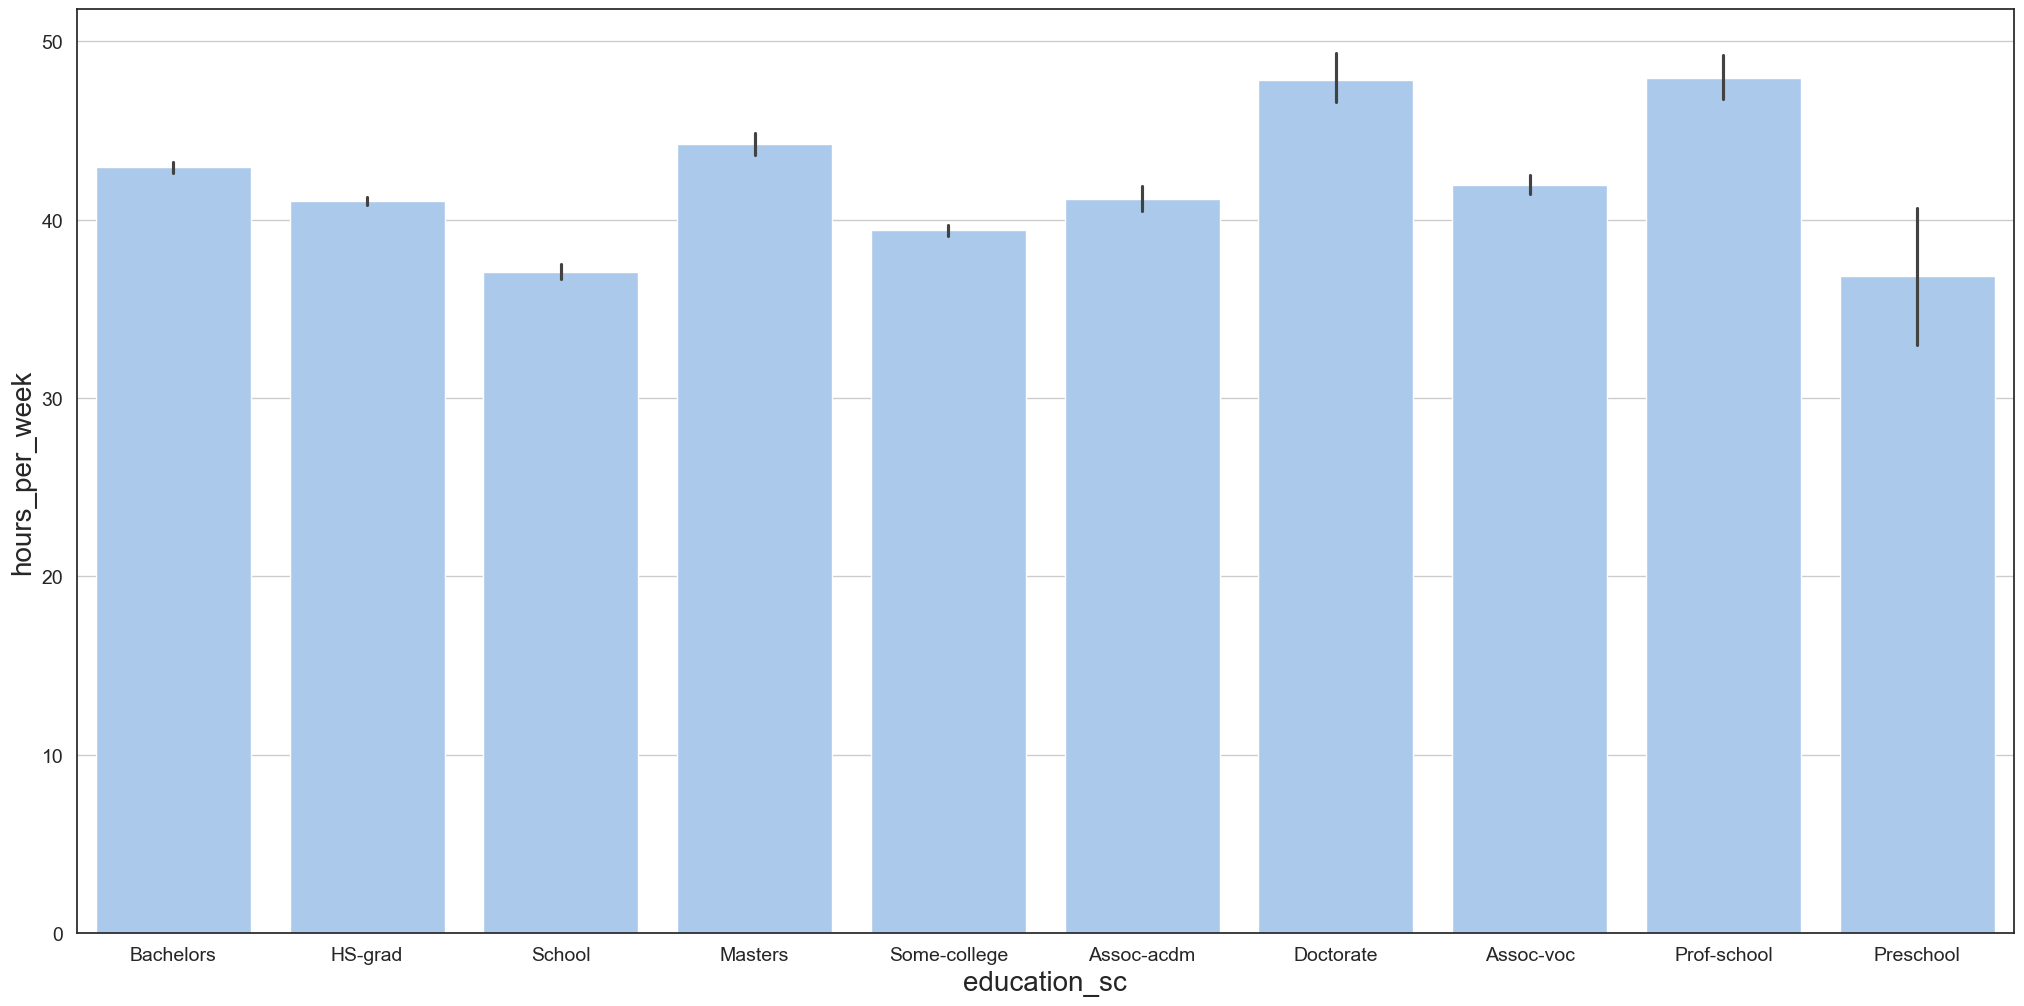

In [46]:
fig0, ax0 = plt.subplots()
sns.barplot(
    data= df, 
    x = "education_sc",
    y = "hours_per_week", 
    ax = ax0
)
plt.show()

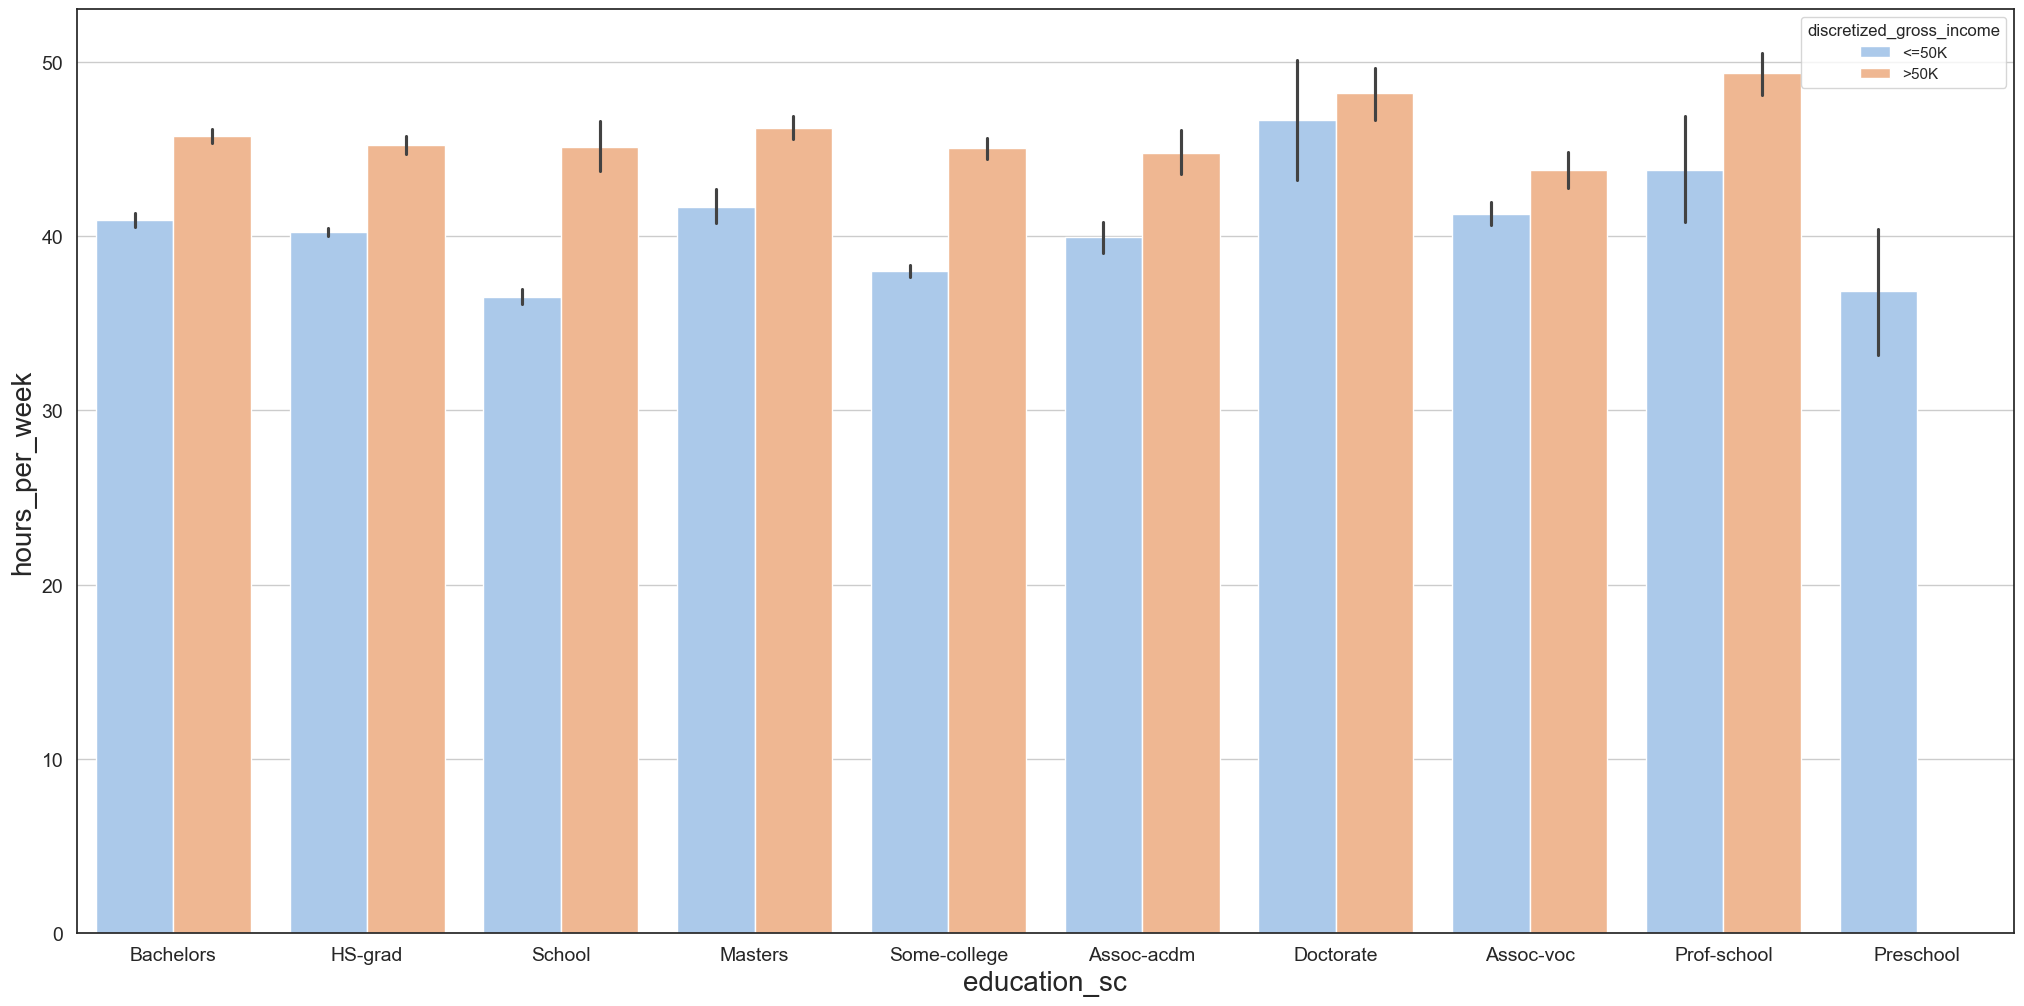

In [47]:
fig0, ax0 = plt.subplots()
sns.barplot(
    data= df, 
    x = "education_sc",
    y = "hours_per_week", 
    hue = "discretized_gross_income",
    ax = ax0
)
plt.show()

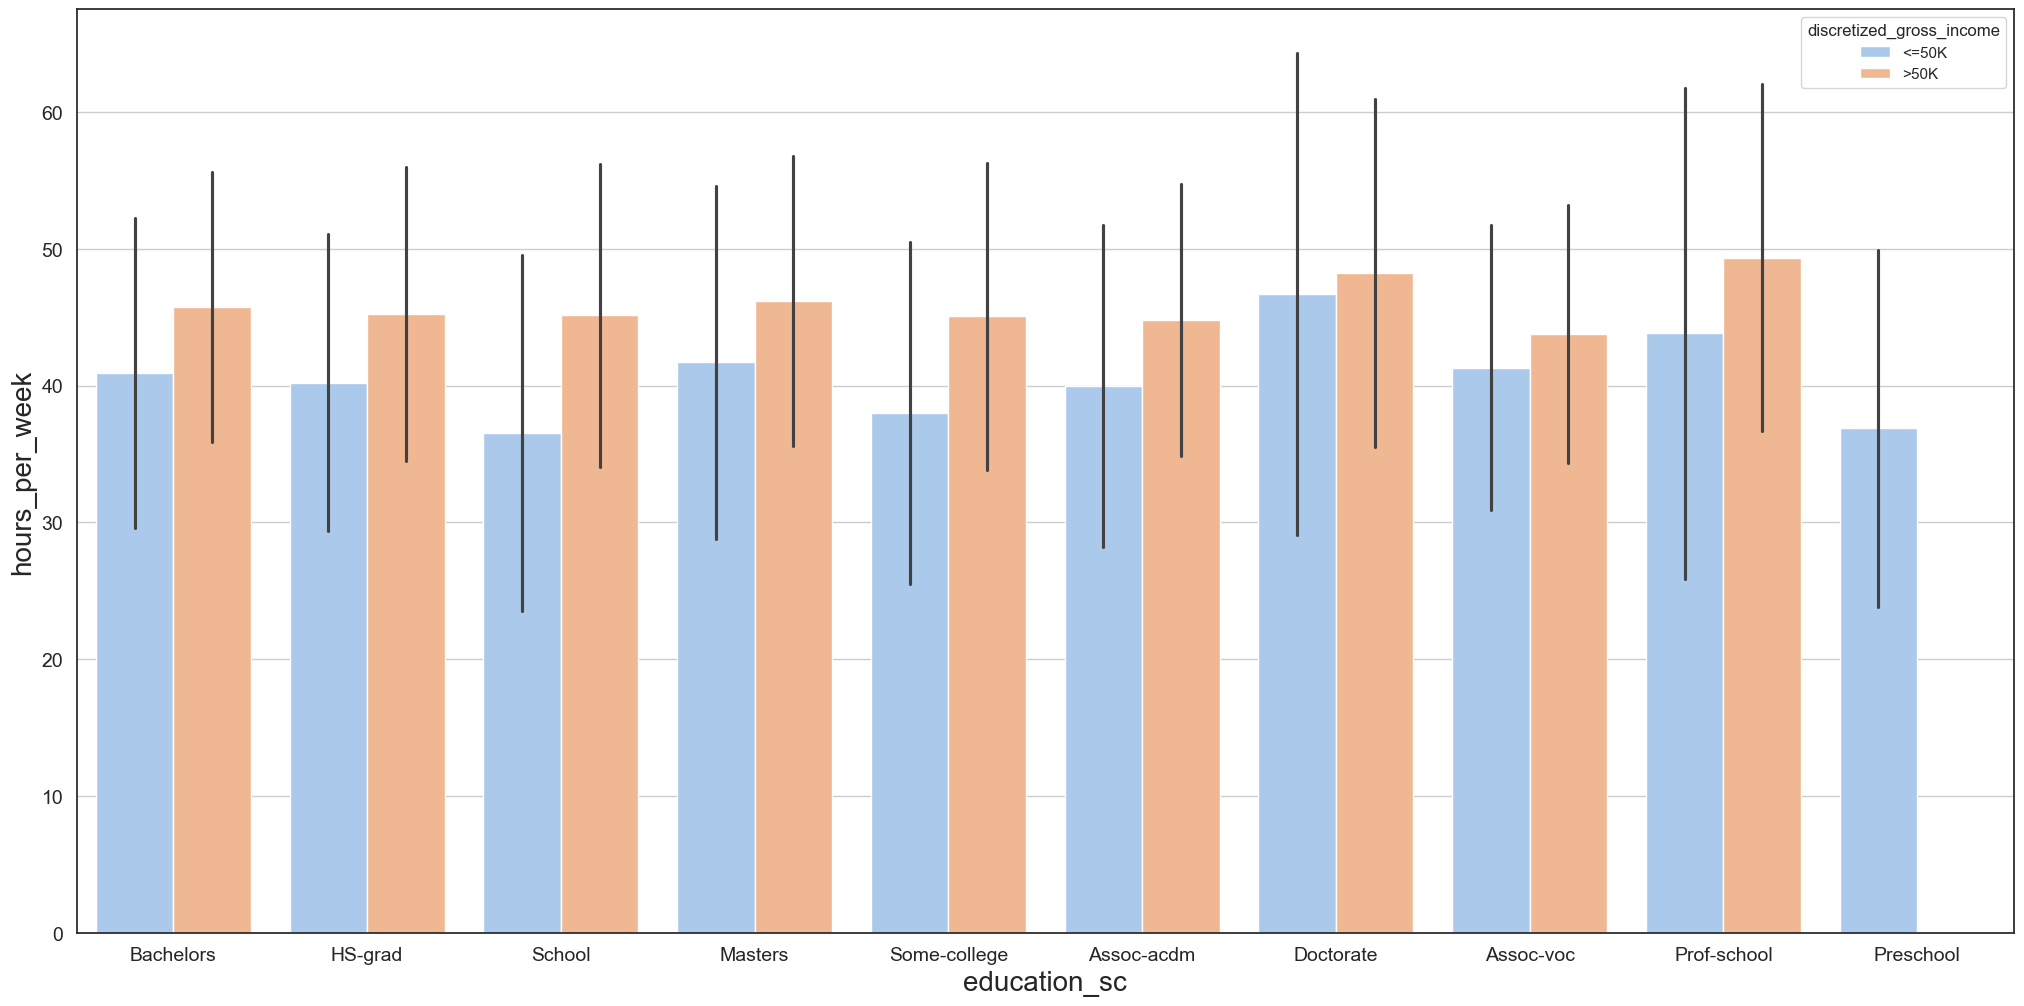

In [48]:
fig0, ax0 = plt.subplots()
sns.barplot(
    data= df, 
    x = "education_sc",
    y = "hours_per_week", 
    hue = "discretized_gross_income",
    errorbar = "sd",
    ax = ax0)
plt.show()

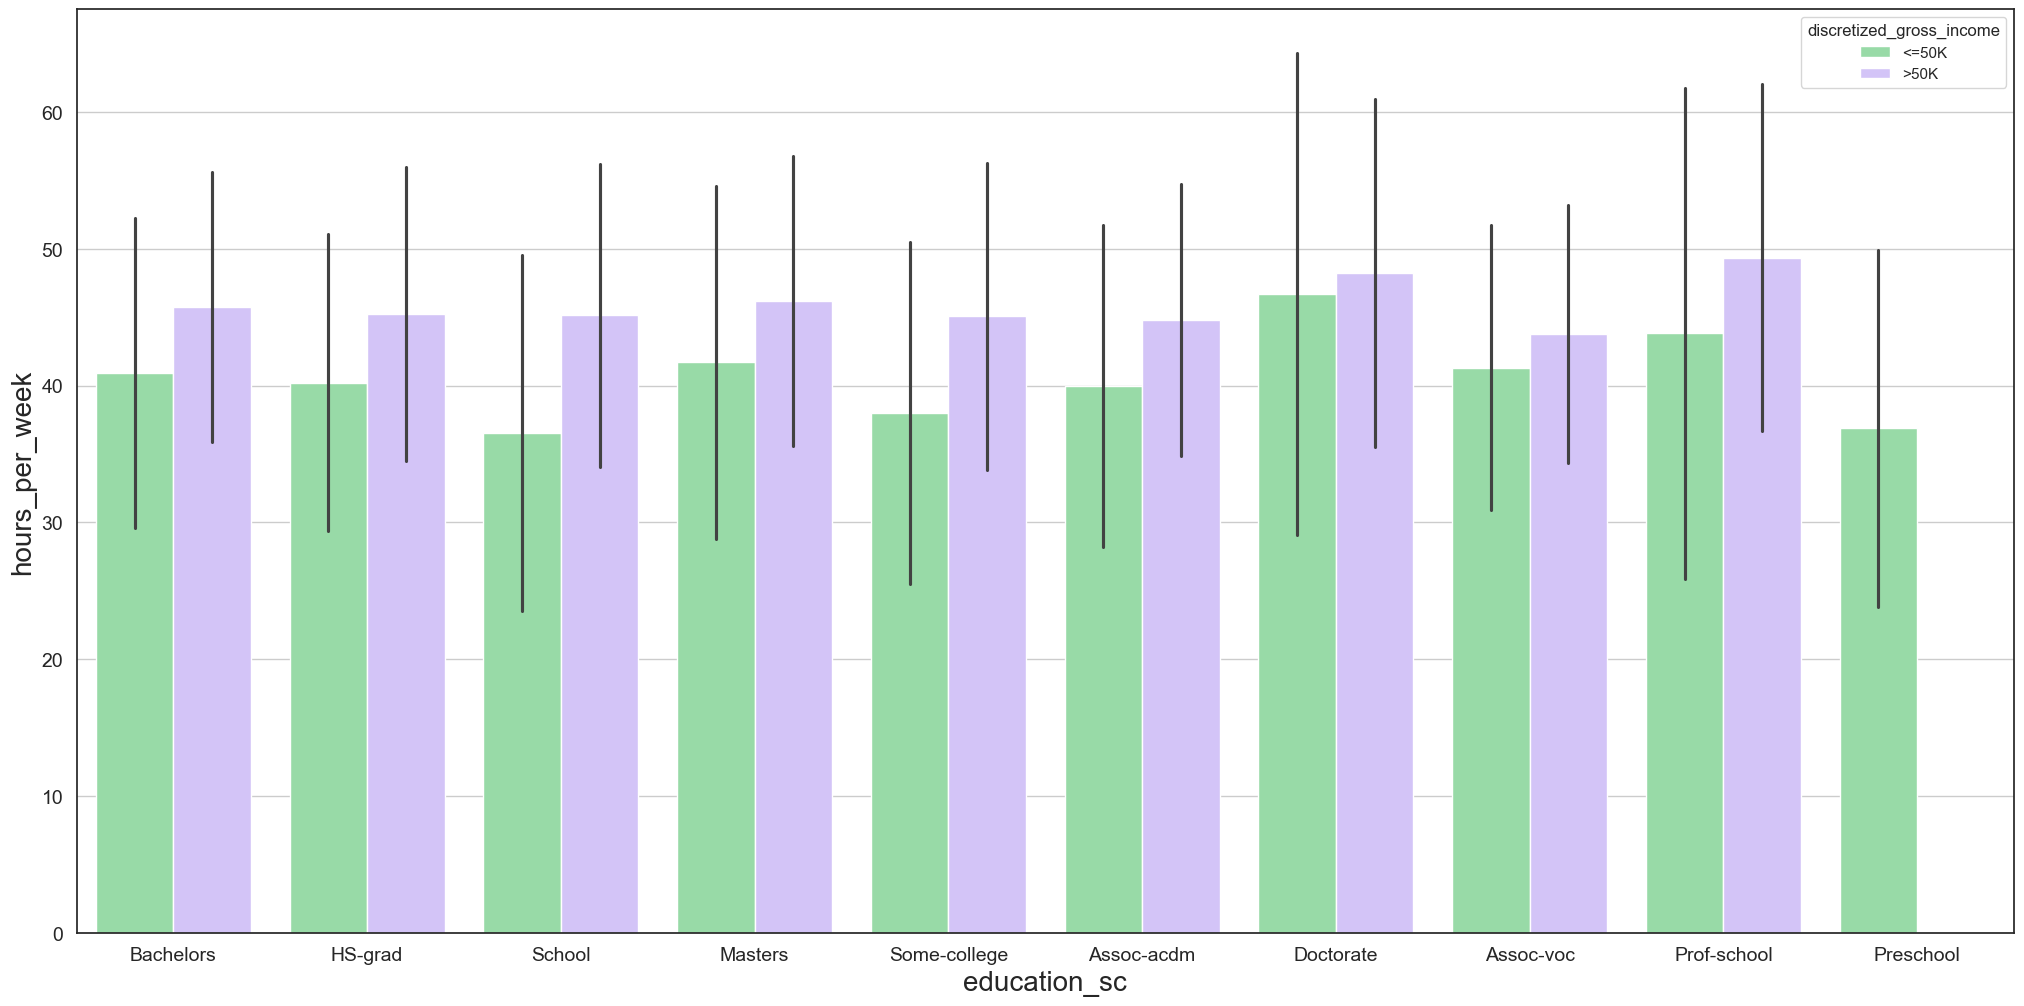

In [49]:
fig0, ax0 = plt.subplots()
sns.barplot(
    data= df, 
    x = "education_sc",
    y = "hours_per_week", 
    hue = "discretized_gross_income",
    errorbar = "sd",
    palette = ['#8de5a1', '#d0bbff'],
    ax = ax0)
plt.show()

In [50]:
df[(df.education_sc=="Bachelors")&(df.discretized_gross_income=="<=50K")].hours_per_week.mean()

40.92049348869089

In [51]:
df[(df.education_sc=="Bachelors")&(df.discretized_gross_income=="<=50K")].hours_per_week.std()

11.35402131238419

### 7. Set the axis labels and plot title for your plot.

Use the method set_xlabel() of the Axes object returned by sns.barplot()

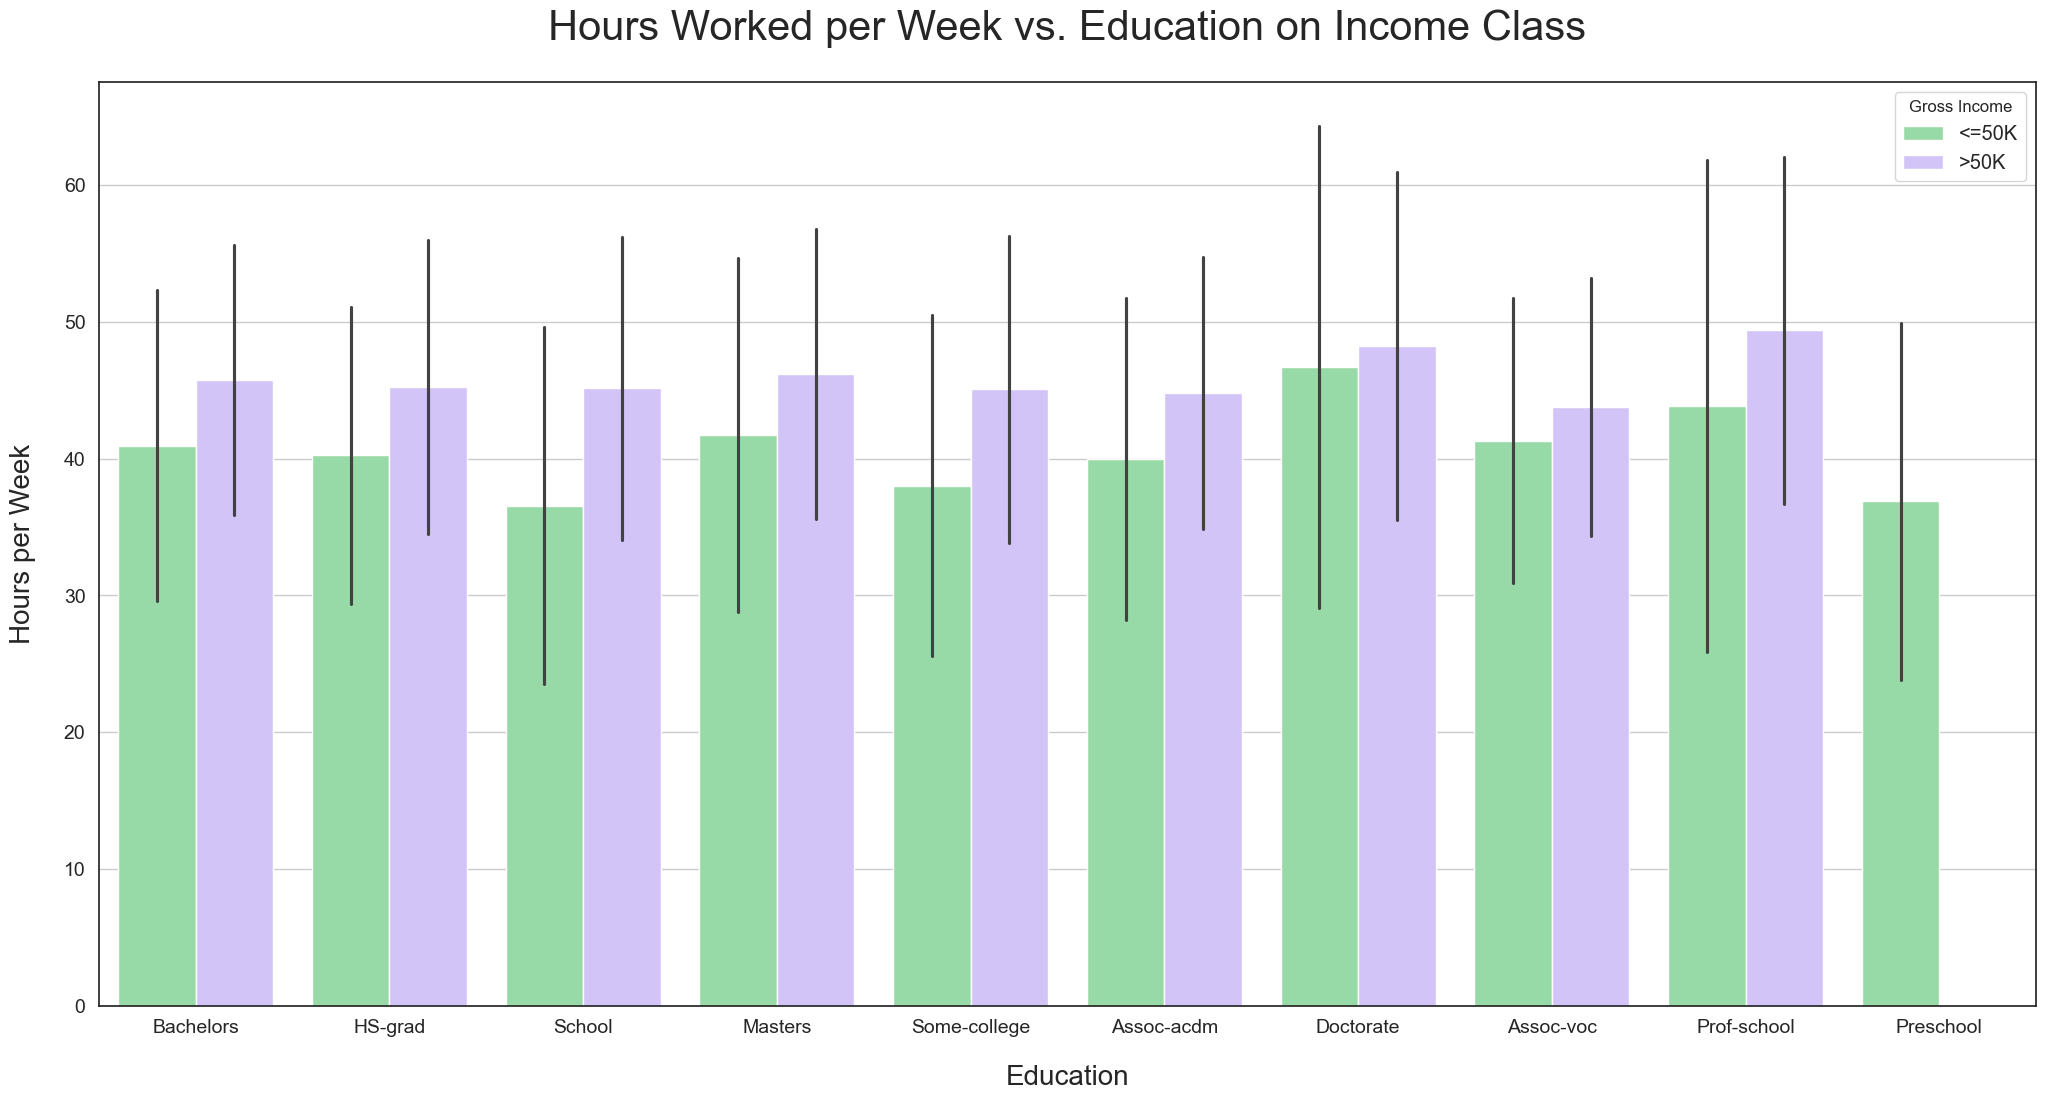

In [52]:
fig1, ax1 = plt.subplots()
sns.barplot(
    data= df, 
    x = "education_sc",
    y = "hours_per_week", 
    hue = "discretized_gross_income",
    errorbar = "sd",
    palette = ['#8de5a1', '#d0bbff'],
    ax = ax1)
ax1.set_xlabel( 
    "Education",
    labelpad = 20.0)
ax1.set_ylabel(
    ylabel = "Hours per Week", 
    labelpad = 20.0)
ax1.set_title(
    "Hours Worked per Week vs. Education on Income Class",
    pad = 30.0)
ax1.legend(title="Gross Income", loc="upper right", fontsize="large")
plt.show()
plt.close()

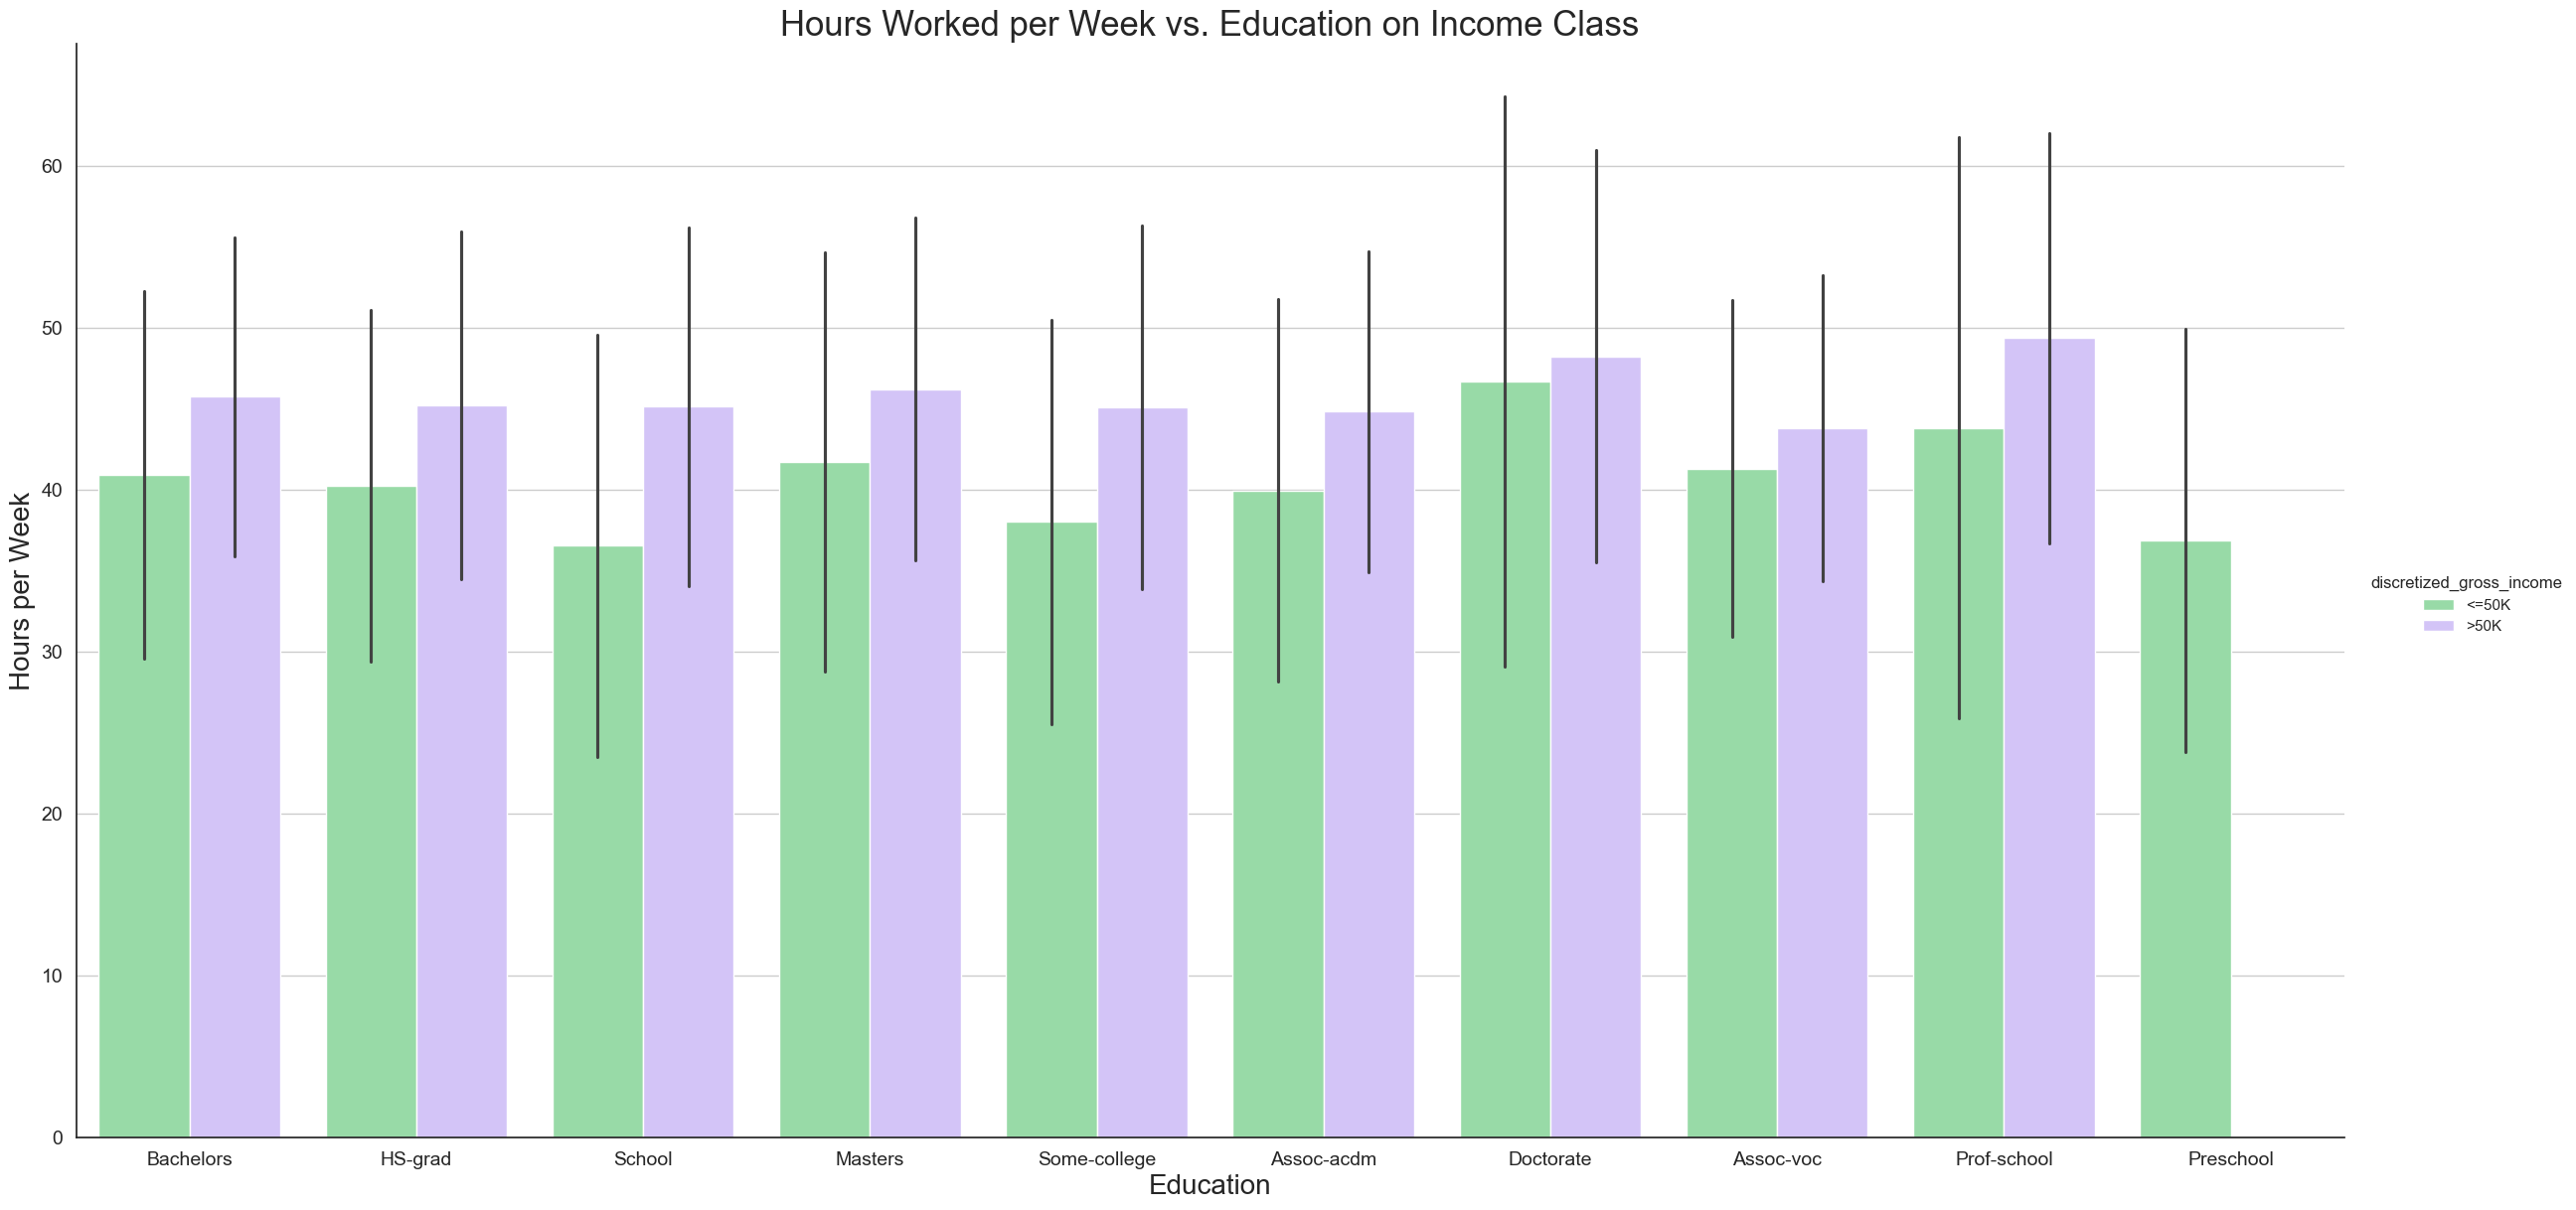

In [48]:
fc1 = sns.catplot(
    data= df, 
    x = "education_sc",
    y = "hours_per_week", 
    hue = "discretized_gross_income",
    errorbar = "sd",
    kind = "bar",
    palette = ['#8de5a1', '#d0bbff'],
    height = 12, aspect = 2
    )
# fc1.ax.set_xlabel("Education", size = 10, labelpad = 20)
# fc1.ax.set_ylabel("Hours per Week", size = 10)
fc1.set_axis_labels("Education", "Hours per Week")
fc1.ax.set_title(
    "Hours Worked per Week vs. Education on Income Class",
    size = 25)
#fc1.figure.set_figwidth(25)
#fc1.figure.set_figheight(12)

plt.show()

### 8. Save this barplot to a pdf file.

Use pdf.savefig().
Close the current plot.

In [55]:
pdf.savefig(fig1)

### 9. Create and customixe a boxplot to visualize distribution of hours worked versus education for both genders in two income classes.

Use sns.catplot(), with the value of the ‘kind’ argument set to 'box’.
To show details of two sexes in two subplots along two rows, set the ‘row’ argument to catplot() to 'sex’.
To differentiate two income classes set the hue argument to discretized_gross_income .
Do not share an x-axis or y-axis between two subplots (for two sexes).

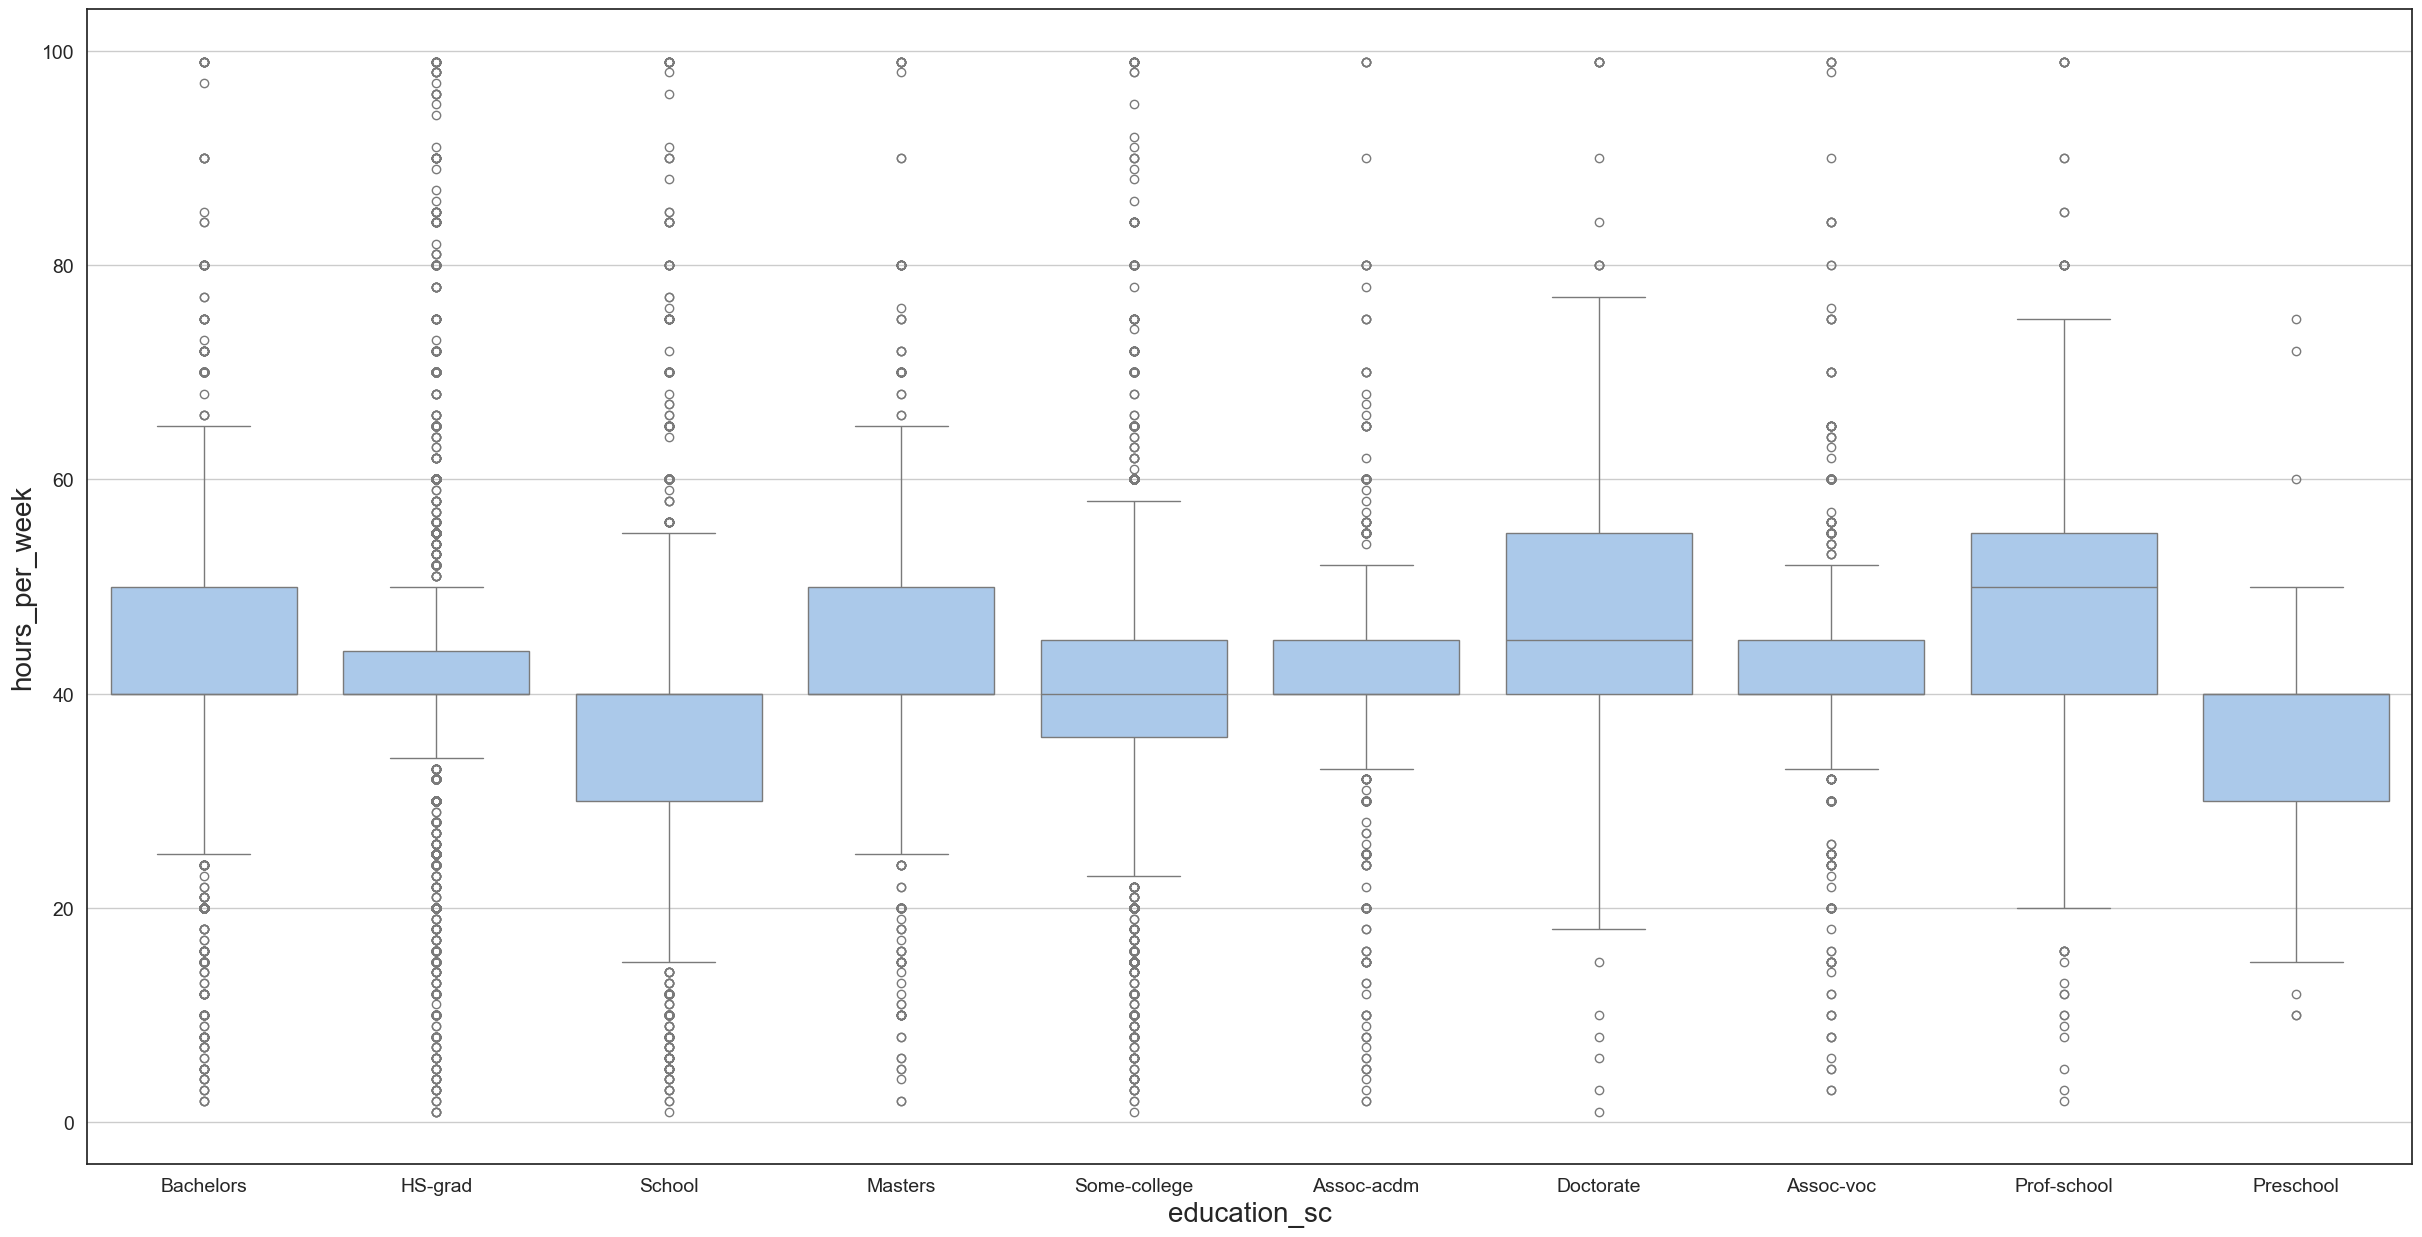

In [56]:
fig, ax = plt.subplots(figsize = (30,15))
sns.boxplot(data = df, x = "education_sc", y = "hours_per_week", ax = ax)
plt.show()

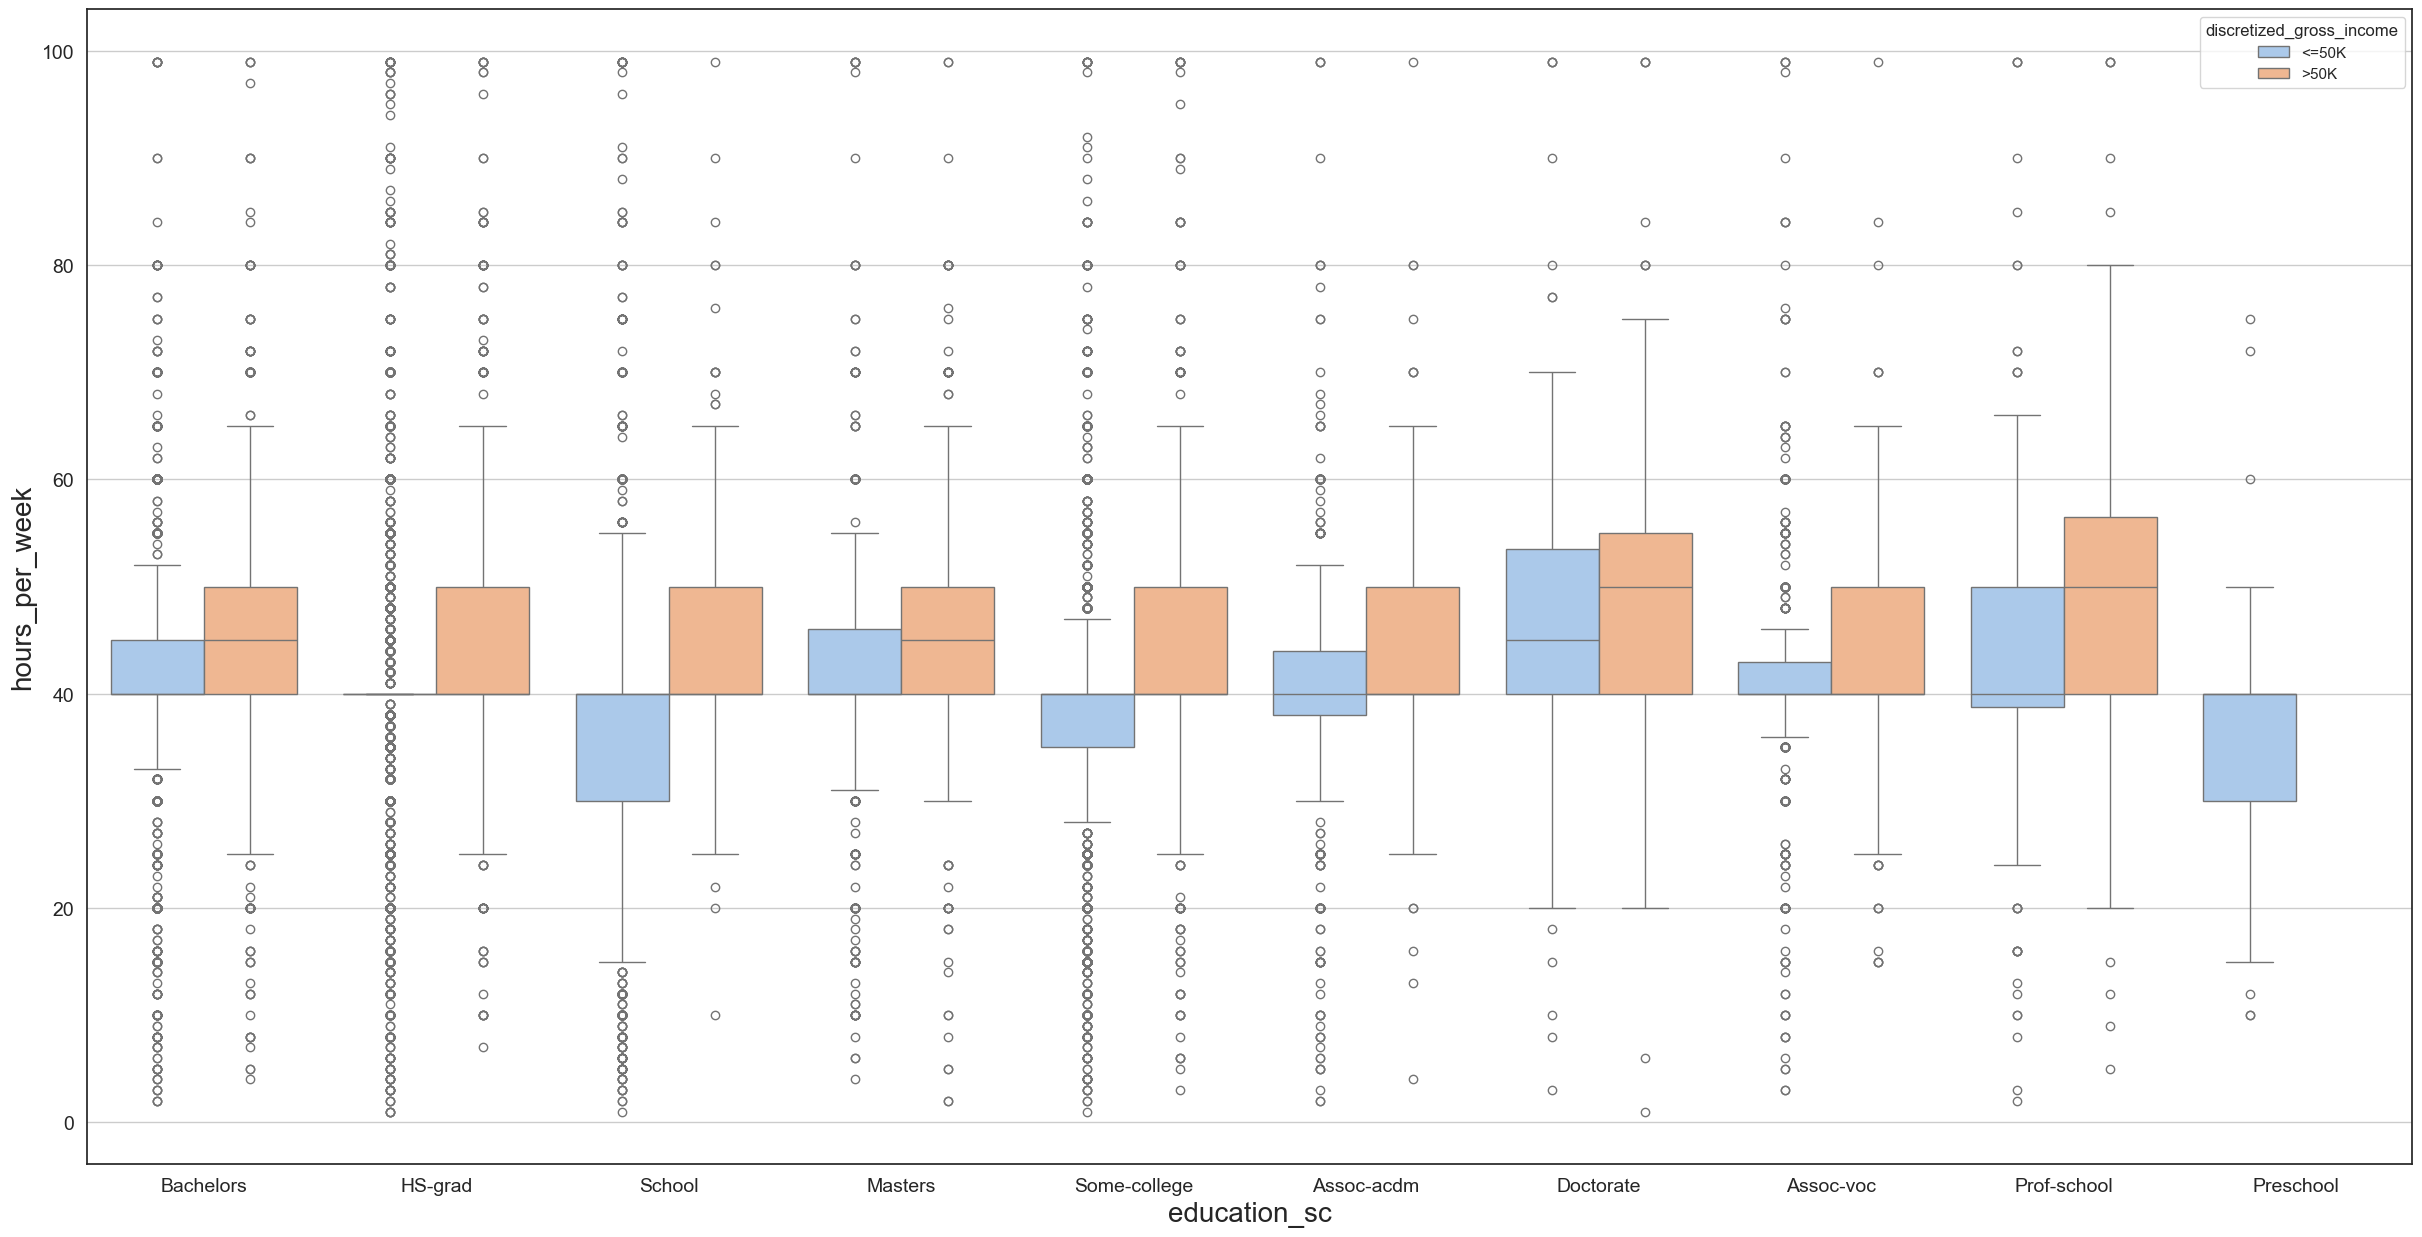

In [57]:
fig, ax = plt.subplots(figsize = (30,15))
sns.boxplot(data = df, x = "education_sc", y = "hours_per_week", hue = "discretized_gross_income", ax = ax)
plt.show()

### Using catplot

In [58]:
sns.set_theme(style = "white",
        palette = "pastel",
        rc = 
        {'figure.figsize':(25,12), 
         'axes.titlesize': 30,
         'axes.labelsize': 14,
         'axes.grid':True,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
) 


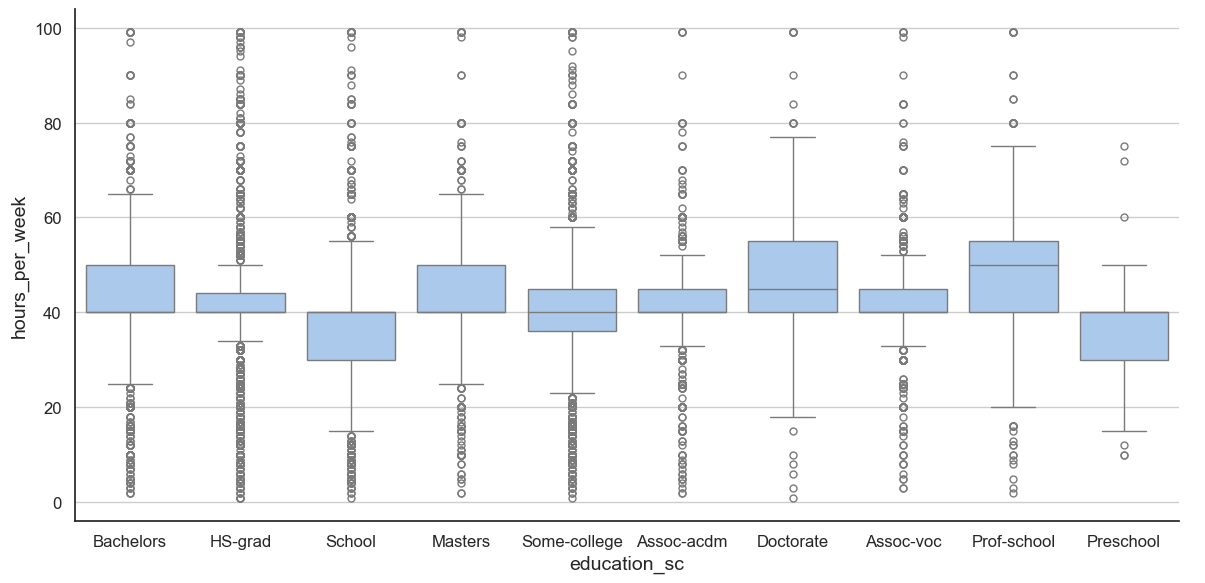

In [59]:
sns.catplot(data = df, x = "education_sc", y = "hours_per_week", 
           kind = "box", height = 6, aspect = 2)
plt.show()

### 10. Set the axis labels and plot title for your plot.

This is similar to in Step 7 above.

### Add the income as hue

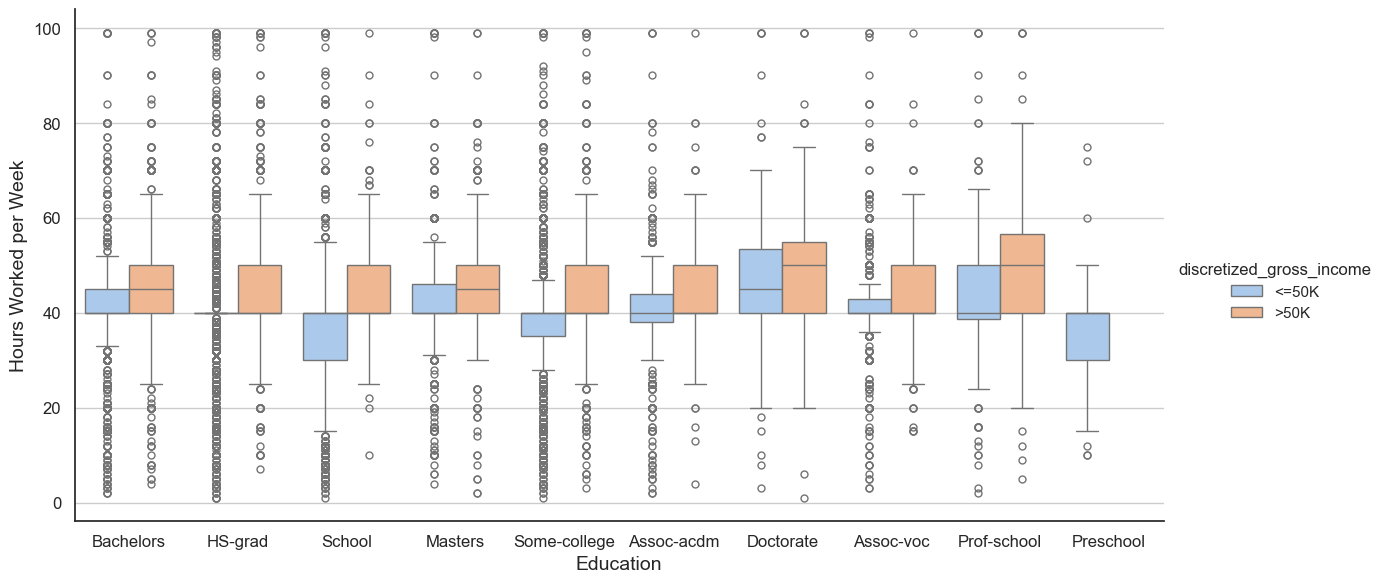

In [60]:
fg = sns.catplot(data = df, x = "education_sc", y = "hours_per_week", 
           kind = "box", height = 6, aspect = 2,
           hue = "discretized_gross_income")
fg.set_axis_labels(x_var = "Education", y_var = "Hours Worked per Week")
plt.show()

### Add sex as row

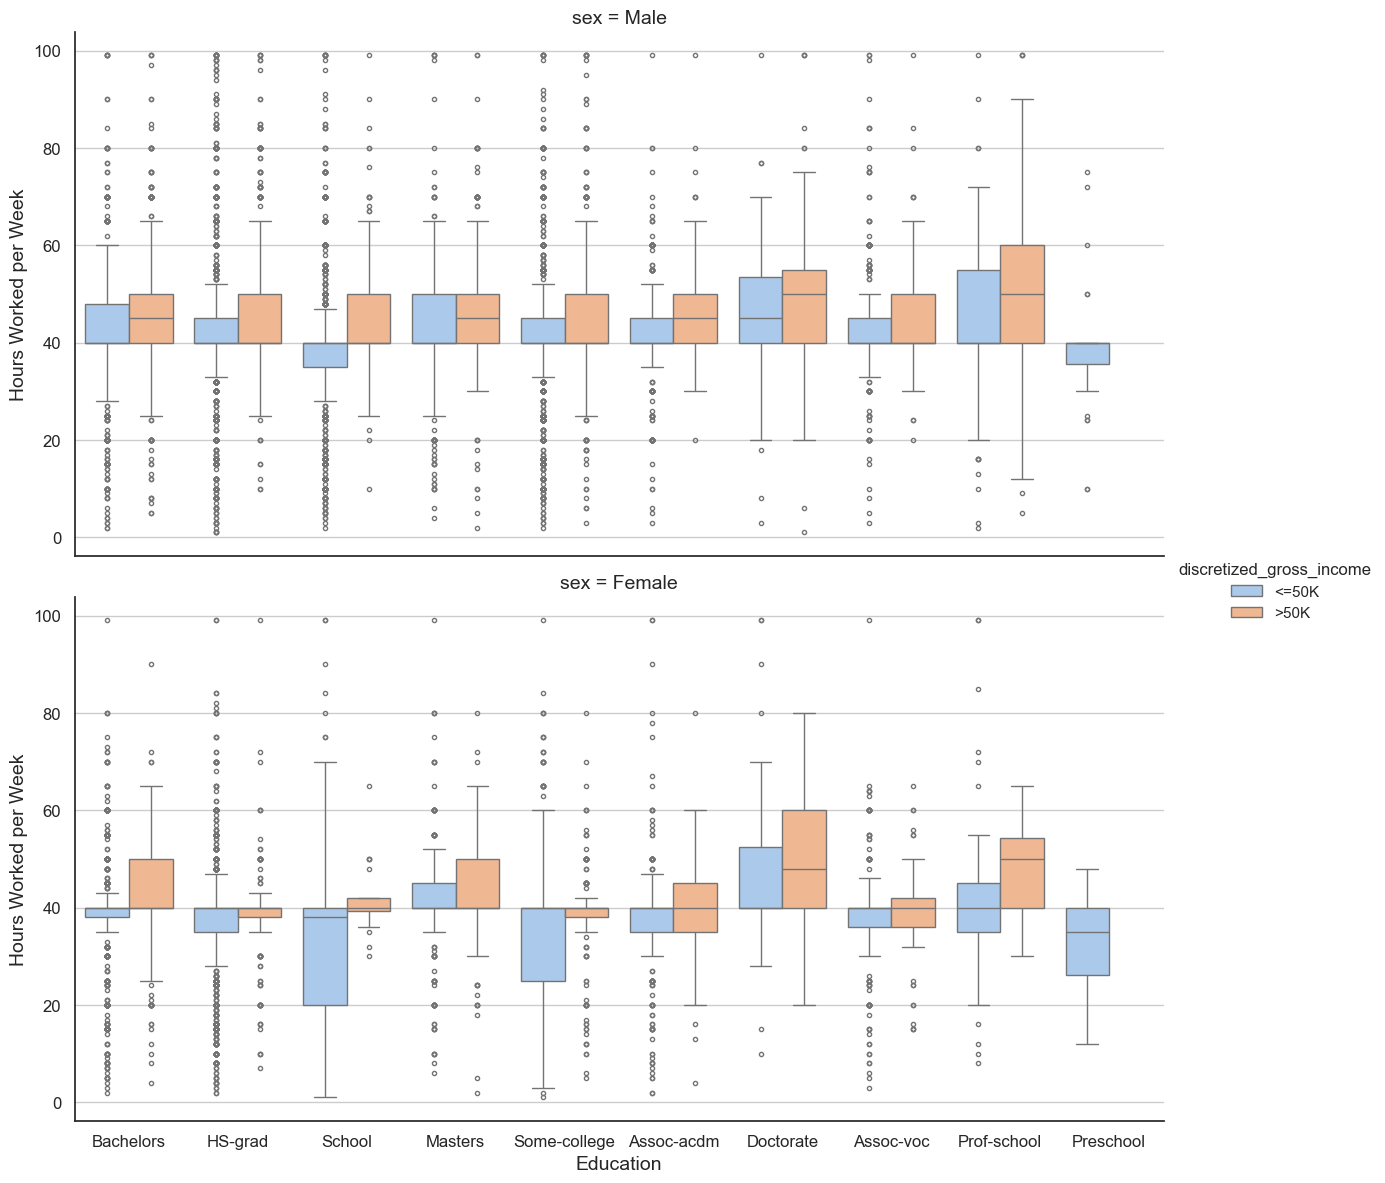

In [61]:
fg = sns.catplot(data = df, x = "education_sc", y = "hours_per_week", 
        kind = "box", height = 6, aspect = 2, 
        flierprops = {"markersize":3},
        hue = "discretized_gross_income",
        row = "sex")
fg.set_axis_labels(x_var = "Education", y_var = "Hours Worked per Week")
plt.show()

### Add title and color palette

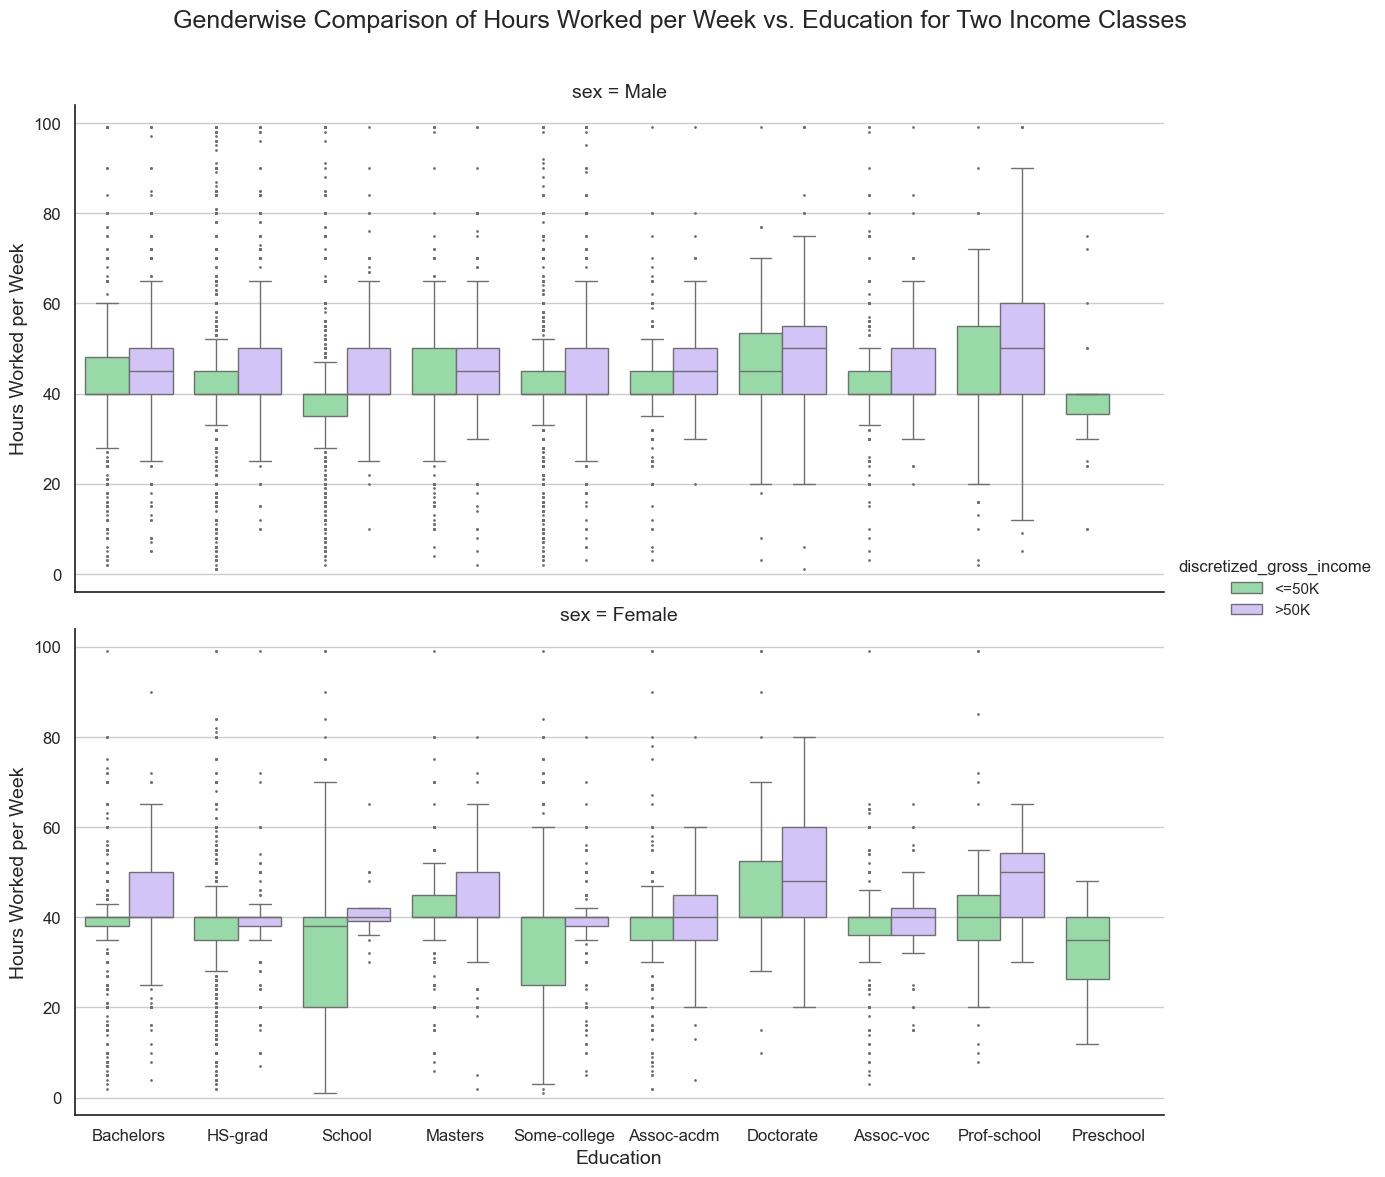

In [62]:
fg = sns.catplot(data = df, x = "education_sc", y = "hours_per_week", 
        kind = "box", height = 6, aspect = 2, 
        flierprops = {"markersize":1},
        hue = "discretized_gross_income",
        row = "sex",
        palette = ['#8de5a1', '#d0bbff'])
fg.set_axis_labels(x_var = "Education", y_var = "Hours Worked per Week")
fg.fig.suptitle(
    "Genderwise Comparison of Hours Worked per Week vs. Education for Two Income Classes",
    size = 18)
fg.fig.subplots_adjust(top = 0.9) 
plt.show()

### Change marker size

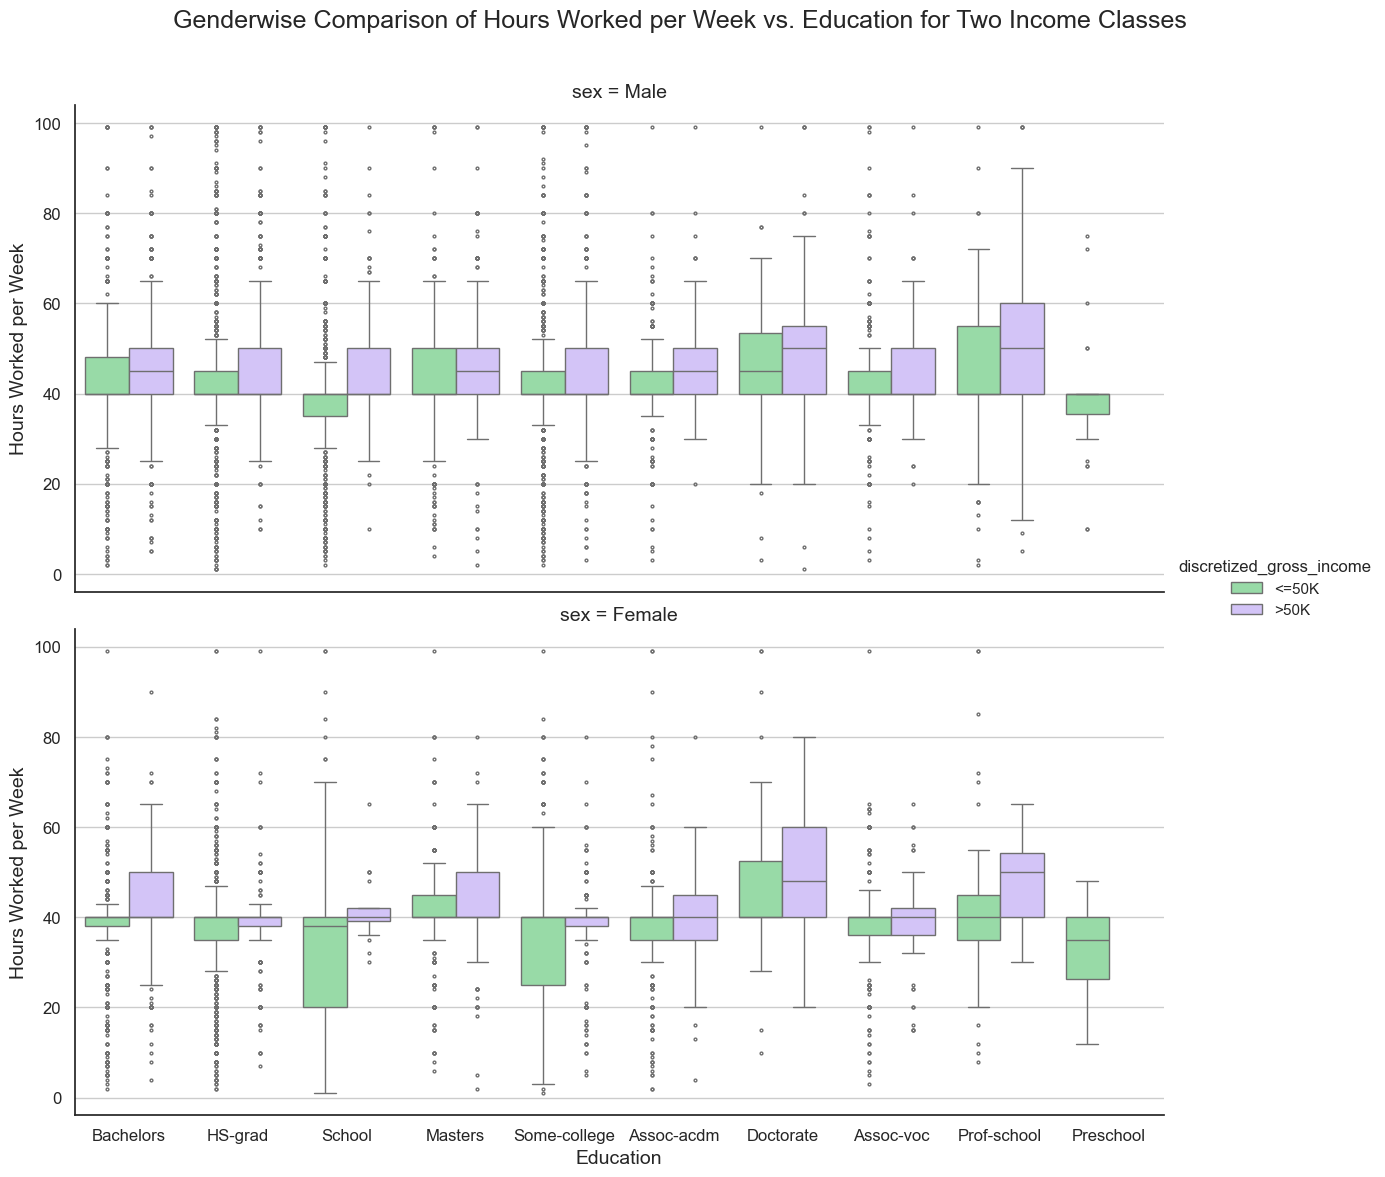

In [66]:
fg = sns.catplot(data = df, x = "education_sc", y = "hours_per_week", 
        kind = "box", height = 6, aspect = 2, 
        flierprops = {"markersize":2},
        hue = "discretized_gross_income",
        row = "sex",
        palette = ['#8de5a1', '#d0bbff'])
fg.set_axis_labels(x_var = "Education", y_var = "Hours Worked per Week")
fg.fig.suptitle(
    "Genderwise Comparison of Hours Worked per Week vs. Education for Two Income Classes",
    size = 18,
    y = 1.03)
fg.fig.subplots_adjust(top = 0.9) 
plt.show()

### Try different layout

[]

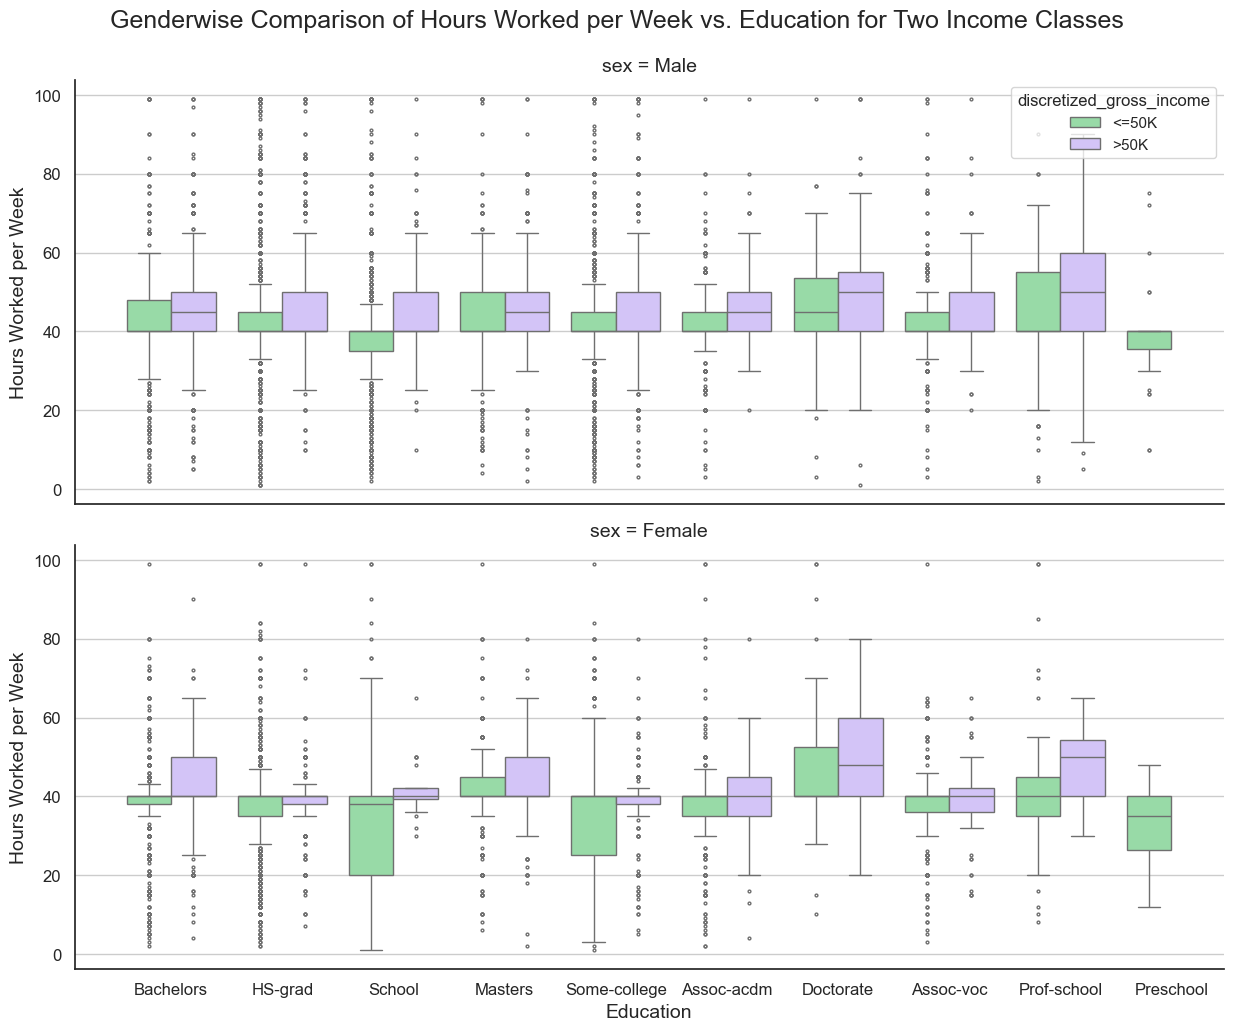

In [68]:
sns.set(style = "white",
        rc = 
        {'figure.figsize':(30,25), 
         'axes.labelsize': 14,
         'axes.grid':True,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
) 
fg = sns.catplot(
    data= df, 
    x = "education_sc",
    y = "hours_per_week", 
    hue = "discretized_gross_income",
    kind = "box",
    row = "sex",
    palette = ['#8de5a1', '#d0bbff'],
    flierprops = {"markersize":2},
    aspect = 2.5,
    legend_out = False)
fg.set_axis_labels(x_var = "Education", y_var = "Hours Worked per Week")
fg.figure.suptitle(
    "Genderwise Comparison of Hours Worked per Week vs. Education for Two Income Classes",
    size = 18,
    y = 1.03)
plt.plot()


### Using boxplot with multiple axes

In [69]:
def make_boxplot(ax, sex):
    mask = (df.sex == sex)
    ax = sns.boxplot(
        data= df[mask], 
        x = "education_sc",
        y = "hours_per_week", 
        hue = "discretized_gross_income",
        palette = ['#8de5a1', '#d0bbff'],
        width = 0.6,
        flierprops = {"marker":".", "markersize":4},
        ax = ax
        )
    ax.set_xlabel( 
        "Education",
        labelpad = 20.0)
    ax.set_ylabel(
        ylabel = "Hours per Week", 
        labelpad = 20.0)
    ax.set_title(
        f"{sex}",
        pad = 20
        )
    ax.legend(title="Gross Income", loc="upper right", fontsize="large")
    return ax

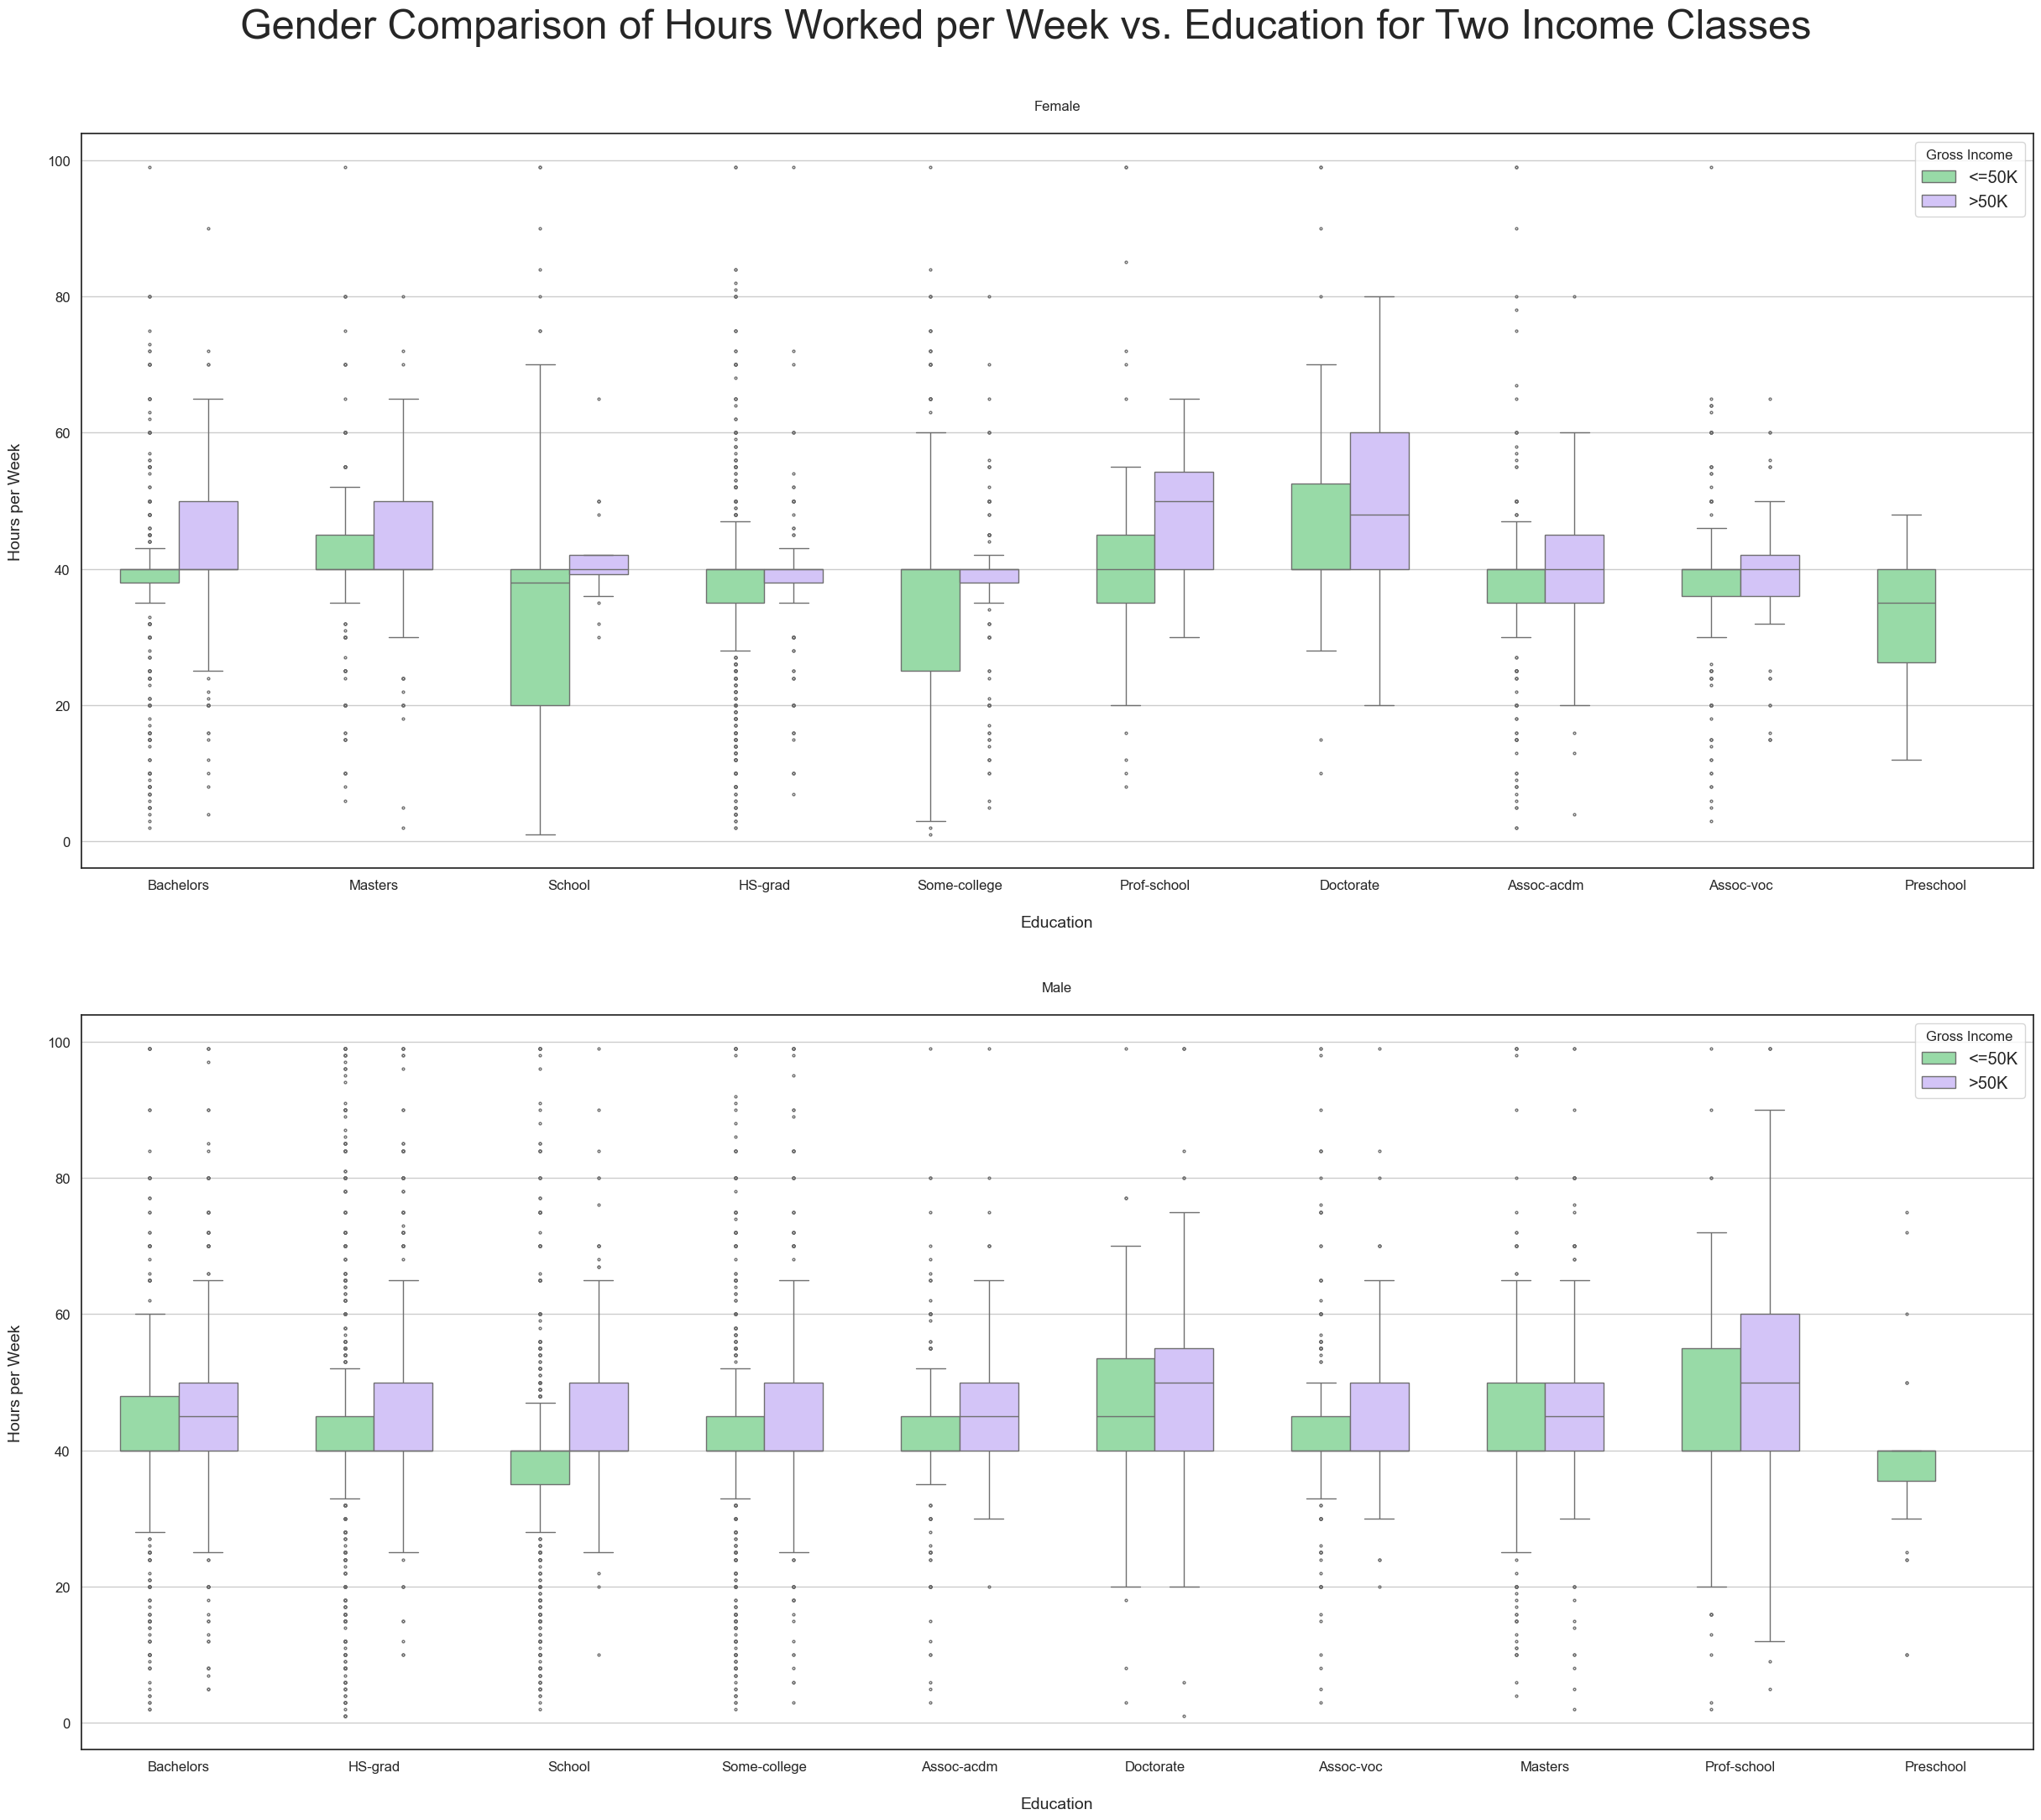

In [70]:
fig2 , (ax2_female, ax2_male) = plt.subplots(2,1, figsize = (30,25))
make_boxplot(ax2_female, "Female")
make_boxplot(ax2_male, "Male")
fig2.suptitle("Gender Comparison of Hours Worked per Week vs. Education for Two Income Classes", size = 35, y = 0.94)
plt.show()

### 11. Save this barplot to a pdf file.

Use pdf.savefig() to save your file as pdf.
Close the current plot.

In [71]:
pdf.savefig(fig2)

In [72]:
pdf.close()

### Other Plots

In [76]:
sns.set_palette("pastel")

<Axes: ylabel='hours_per_week'>

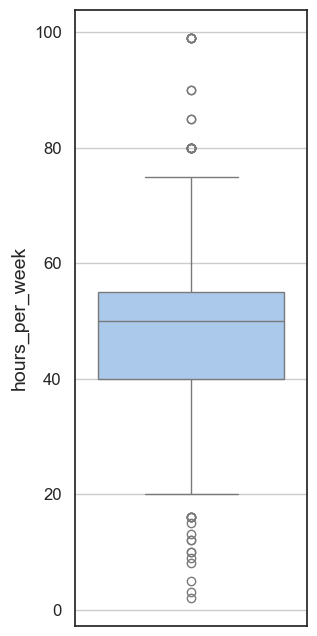

In [77]:
fig0, ax0 = plt.subplots(figsize = (3,8))
mask = (df.education_sc == "Prof-school") 
sns.boxplot(data = df[mask], y = "hours_per_week", ax = ax0)

In [78]:
df[mask].hours_per_week.median()

50.0

In [79]:
mask = (df.education_sc == "Prof-school") 
sum_data = df[mask].hours_per_week.describe().round(2)
sum_data.mean

<bound method Series.mean of count    542.00
mean      47.96
std       14.37
min        2.00
25%       40.00
50%       50.00
75%       55.00
max       99.00
Name: hours_per_week, dtype: float64>

In [80]:
sum_data["25%"]

40.0

<Axes: xlabel='hours_per_week'>

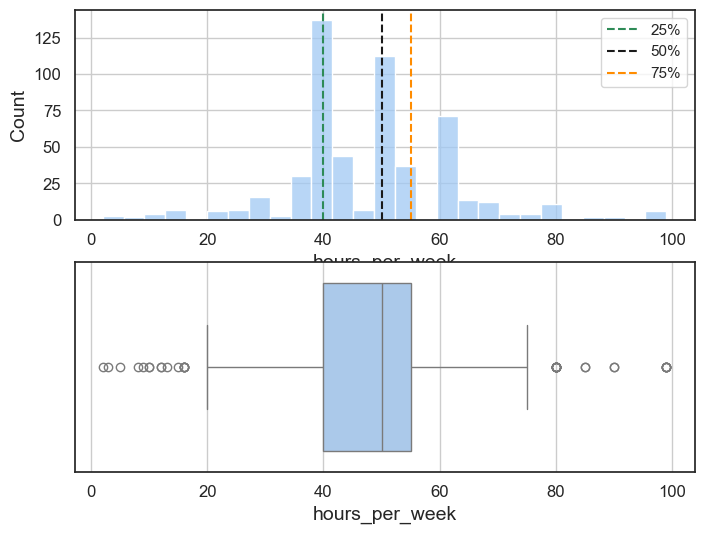

In [81]:
mask_ps = (df.education_sc == "Prof-school") 
df_ps = df[mask_ps]
df_sum_data = df_ps.hours_per_week.describe().round(2)

fig, (ax1,ax2) = plt.subplots(figsize = (8,6), ncols = 1, nrows = 2)

sns.histplot(data = df_ps, x = "hours_per_week", ax = ax1)
ax1.axvline(df_sum_data["25%"], c = "seagreen", ls = "--", label = "25%" )
ax1.axvline( df_sum_data["50%"], c = "k", ls = "--", label = "50%" )
ax1.axvline(df_sum_data["75%"], c = "darkorange", ls = "--", label = "75%" )
ax1.legend()
sns.boxplot(data = df_ps, x = "hours_per_week", ax = ax2)

<Axes: xlabel='hours_per_week'>

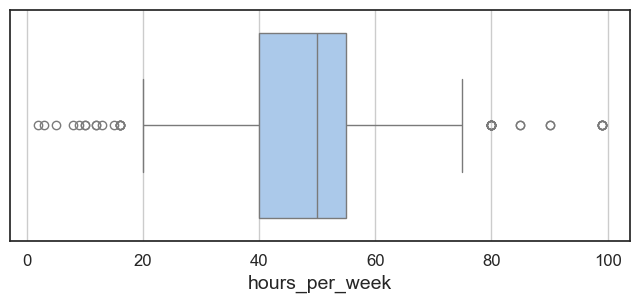

In [82]:
mask_ps = (df.education_sc == "Prof-school") 
df_ps = df[mask_ps]
fig, ax = plt.subplots(figsize = (8,3))
sns.boxplot(data = df_ps, x = "hours_per_week", ax = ax)